# **MINI CHALLENGE**

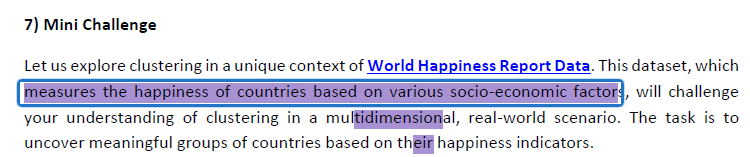



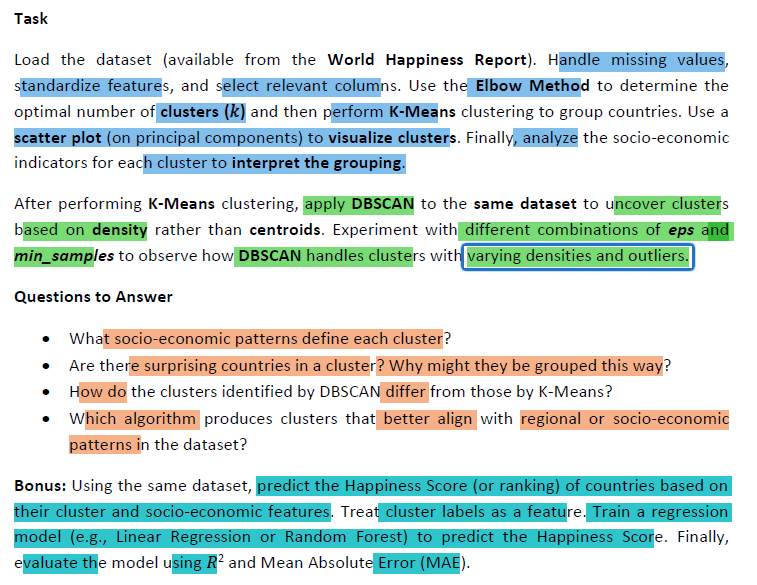

# **0. Functions Library For Analysis Of Dataset**

## **Univariate Analysis Function For Numerical Features**

In [ ]:
def analyze_numerical_feature(df, feature):
    # Statistical summary and skewness
    stats = df[feature].describe()
    skewness = df[feature].skew()
    missing_values = df[feature].isnull().sum()  # Calculate missing values

    # Set up a canvas for plotting
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Histogram
    axs[0, 0].hist(df[feature].dropna(), bins=20, color='skyblue', edgecolor='black')  # Exclude missing values
    axs[0, 0].set_title(f'Histogram of {feature}')
    axs[0, 0].set_xlabel(feature)
    axs[0, 0].set_ylabel('Frequency')

    # KDE Plot
    sns.kdeplot(df[feature].dropna(), ax=axs[0, 1], color='purple', fill=True)  # Exclude missing values
    axs[0, 1].set_title(f'KDE Plot of {feature}')
    axs[0, 1].set_xlabel(feature)
    axs[0, 1].set_ylabel('Density')

    # Boxplot
    sns.boxplot(x=df[feature], ax=axs[1, 0], color='lightgreen')
    axs[1, 0].set_title(f'Boxplot of {feature}')
    axs[1, 0].set_xlabel(feature)

    # Key Metrics
    axs[1, 1].axis('off')  # Turn off the axis
    textstr = (
        f"### Key Metrics ###\n\n"
        f"{stats.to_string()}\n\n"
        f"Skewness: {skewness:.2f}\n"
        f"Missing Values: {missing_values}"
    )
    axs[1, 1].text(
        0.5, 0.5, textstr, fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle="round", facecolor="lightgrey")
    )

    # Adjust layout
    plt.tight_layout()
    plt.show()


## **Univariate Analysis Function For Categorical Features**

In [ ]:


def analyze_categorical_feature(df, column):
    """
    Perform univariate analysis for a categorical variable in a presentable manner.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The column name of the categorical variable to analyze.
    """
    # Value counts
    value_counts = df[column].value_counts()
    missing_values = df[column].isnull().sum()

    # Set up subplots for bar and pie charts
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Bar Plot
    value_counts.plot(kind='bar', color='skyblue', ax=axs[0])
    axs[0].set_title(f'Bar Plot of {column}', fontsize=14)
    axs[0].set_xlabel(column, fontsize=12)
    axs[0].set_ylabel('Frequency', fontsize=12)

    # Pie Chart
    value_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green', 'yellow', 'orange', 'skyblue', 'violet', 'pink', 'purple', 'lightgrey', 'brown', 'grey', 'lightgreen'], ax=axs[1])
    axs[1].set_title(f'Pie Chart of {column}', fontsize=14)
    axs[1].set_ylabel('')  # Remove y-label for the pie chart

    # Summary Box
    axs[2].axis('off')  # Turn off the axis
    summary_text = f"### Analysis of '{column}' ###\n\n"
    summary_text += "Value Counts:\n"
    summary_text += "\n".join([f"{index}: {value}" for index, value in value_counts.items()])
    summary_text += f"\n\nMissing Values: {missing_values}"
    axs[2].text(0.5, 0.5, summary_text, fontsize=12, ha='center', va='center',
                bbox=dict(boxstyle="round", facecolor="lightgrey"))

    # Adjust layout
    plt.tight_layout()
    plt.show()


## **Bivariate Analysis Of Numerical Features**


In [ ]:

def bivariate_analysis_numerical_numerical(df, feature1, feature2):
    """
    Perform bivariate analysis between two numerical features, displaying only
    the scatter plot and the correlation coefficient, with different colors for each feature.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature1 (str): The column name of the first numerical feature.
        feature2 (str): The column name of the second numerical feature.
    """
    # Calculate correlation coefficient
    correlation_coefficient = df[[feature1, feature2]].corr().iloc[0, 1]

    # Set up a canvas for plotting with a smaller figure size
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Define unique colors for the features
    feature1_color = 'skyblue'
    feature2_color = 'orange'

    # Scatter Plot with Regression Line and Different Colors
    sns.regplot(x=feature1, y=feature2, data=df, ax=axs[0], scatter_kws={'alpha': 0.6, 'color': feature1_color}, line_kws={'color': feature2_color})
    axs[0].set_title(f'Scatterplot with Regression: {feature1} vs {feature2}', fontsize=14)
    axs[0].set_xlabel(feature1, fontsize=12)
    axs[0].set_ylabel(feature2, fontsize=12)

    # Display Correlation Coefficient with different color text
    axs[1].axis('off')  # Turn off the axis
    textstr = f"### Correlation Analysis ###\n\nCorrelation Coefficient: {correlation_coefficient:.2f}"
    axs[1].text(0.5, 0.5, textstr, fontsize=14, ha='center', va='center', bbox=dict(boxstyle="round", facecolor="lightgreen"))

    # Adjust layout
    plt.tight_layout()
    plt.show()


## **Bivariate Analysis Of Numerical Features With Class**


In [ ]:
def bivariate_analysis_numerical_categorical(df, numerical_feature, categorical_feature):
    """
    Perform bivariate analysis between a numerical feature and a categorical feature.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        numerical_feature (str): The column name of the numerical feature.
        categorical_feature (str): The column name of the categorical feature.
    """
    # Set up a canvas for plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))  # 3 rows, 1 column layout

    # Bar Plot
    sns.barplot(x=categorical_feature, y=numerical_feature, data=df, ax=axs[0], ci=None, palette='Set2')
    axs[0].set_title(f'Bar Plot: {numerical_feature} by {categorical_feature}', fontsize=14)
    axs[0].set_xlabel(categorical_feature, fontsize=12)
    axs[0].set_ylabel(numerical_feature, fontsize=12)

    # Box Plot
    sns.boxplot(x=categorical_feature, y=numerical_feature, data=df, ax=axs[1], palette='Set3')
    axs[1].set_title(f'Box Plot: {numerical_feature} by {categorical_feature}', fontsize=14)
    axs[1].set_xlabel(categorical_feature, fontsize=12)
    axs[1].set_ylabel(numerical_feature, fontsize=12)

    # KDE Plot
    for category in df[categorical_feature].dropna().unique():
        subset = df[df[categorical_feature] == category]
        sns.kdeplot(subset[numerical_feature], ax=axs[2], label=str(category), fill=True)
    axs[2].set_title(f'KDE Plot: {numerical_feature} by {categorical_feature}', fontsize=14)
    axs[2].set_xlabel(numerical_feature, fontsize=12)
    axs[2].set_ylabel('Density', fontsize=12)
    axs[2].legend(title=categorical_feature)

    # Adjust layout
    plt.tight_layout()
    plt.show()


## **Missing Values Checking Function**

In [ ]:


def check_missing_values(dataframe):
    """
    Check for missing values in a pandas DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to check for missing values.

    Returns:
    list: A list of column names with missing values, or a message if no missing values are present.
    """
    # Identify columns with missing values
    missing_columns = dataframe.columns[dataframe.isnull().any()].tolist()

    if missing_columns:
        print("The following columns contain missing values:")
        return missing_columns
    else:
        print("No missing values found in the dataset.")
        return []



## **Duplicated Values Checking Function**

In [ ]:

def check_duplicates(dataframe, ignore_column='Class'):
    """
    Check for duplicate rows in a pandas DataFrame while ignoring a specific column.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to check for duplicate rows.
    ignore_column (str): The column to ignore while checking for duplicates.

    Returns:
    pd.DataFrame: A DataFrame containing duplicate rows, or a message if no duplicates are found.
    """
    # Ensure the column to ignore exists
    if ignore_column in dataframe.columns:
        # Exclude the column to ignore when checking for duplicates
        duplicates = dataframe[dataframe.drop(columns=[ignore_column]).duplicated()]
    else:
        duplicates = dataframe[dataframe.duplicated()]

    if not duplicates.empty:
        print("Duplicate rows found:")
        return duplicates
    else:
        print("No duplicate rows found in the dataset")
        return pd.DataFrame()  # Return an empty DataFrame if no duplicates




## **Percentage Of Duplicates**

In [ ]:
def calculate_duplicate_percentage(dataframe, ignore_column='Class'):
    """
    Calculate the percentage of duplicate rows in a pandas DataFrame
    while ignoring a specific column.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to check for duplicate rows.
    ignore_column (str): The column to ignore while checking for duplicates.

    Returns:
    float: Percentage of duplicate rows in the DataFrame.
    """
    # Get duplicate rows using the check_duplicates function
    duplicates = check_duplicates(dataframe, ignore_column)

    # Calculate the percentage of duplicates
    total_rows = len(dataframe)
    duplicate_count = len(duplicates)

    if total_rows == 0:
        print("The dataset is empty. Percentage of duplicates cannot be calculated.")
        return 0.0  # Avoid division by zero

    duplicate_percentage = (duplicate_count / total_rows) * 100
    print(f"Percentage of duplicate rows: {duplicate_percentage:.2f}%")
    return duplicate_percentage


# **1. Importing All Necessary Libraries**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats
from sklearn.metrics import silhouette_score

# Plot styles to set aesthetic preferences for your visualizations.
sns.set()
plt.style.use('ggplot')

# **2. Dataset Overview**

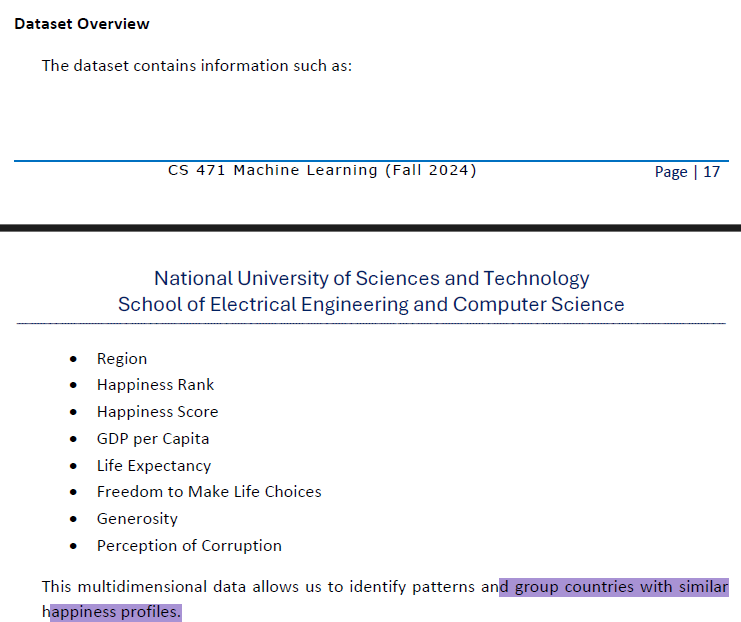

## **2.1 Installing Kaggle**

In [ ]:
!pip install kaggle

## **2.2 Downloading The Dataset Files**

In [ ]:
!kaggle datasets download -d unsdsn/world-happiness

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
world-happiness.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/world-happiness.zip

Archive:  /content/world-happiness.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


# **3 Inspecting the dataset for year 2019**

In [ ]:
df = pd.read_csv('/content/2019.csv')
df.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## **3.1 visually identify the maximum value in specific columns**



In [ ]:
original=df.copy()
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]

df.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])

In [ ]:
df.shape

(156, 9)

## **3.2 Finding out attributes which are highly correlated to each other through heatmap.**

<Axes: >

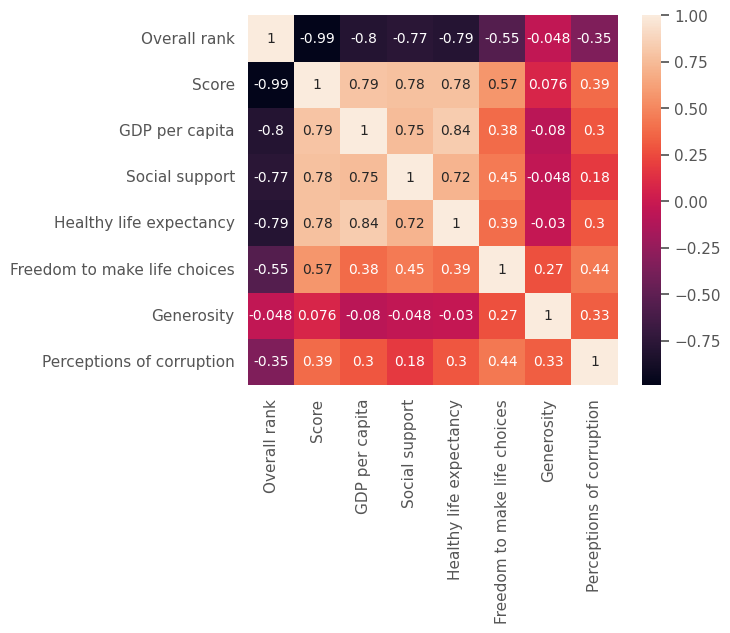

In [ ]:
# df3 without country and region
df3=df.drop(['Country or region'],axis=1)
corrmat = df3.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, annot = True, square=True)

<Axes: >

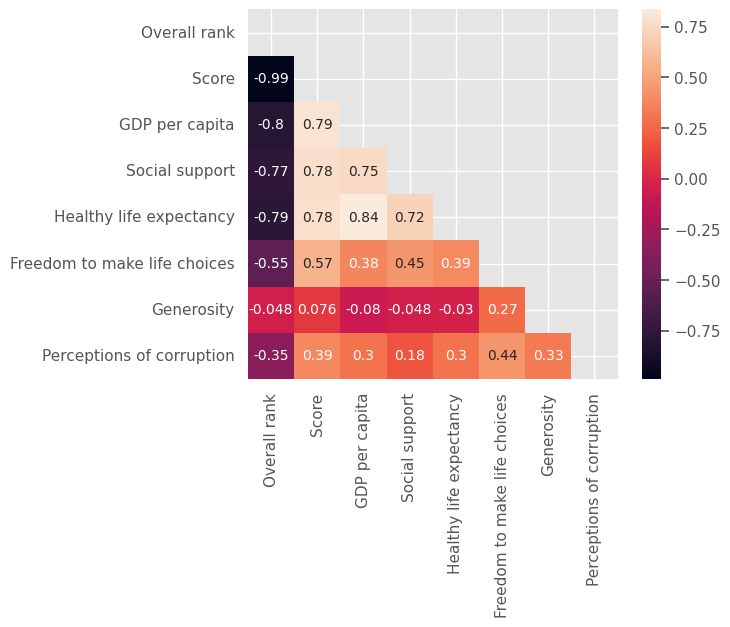

In [ ]:

# df3 without country and region
df3=df.drop(['Country or region'],axis=1)
cor = df3.corr()
f, ax = plt.subplots()
# masking the upper triagle repleated values
masking = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(corrmat, annot = True, square=True , mask=masking)

## **3.3 Pairplots**

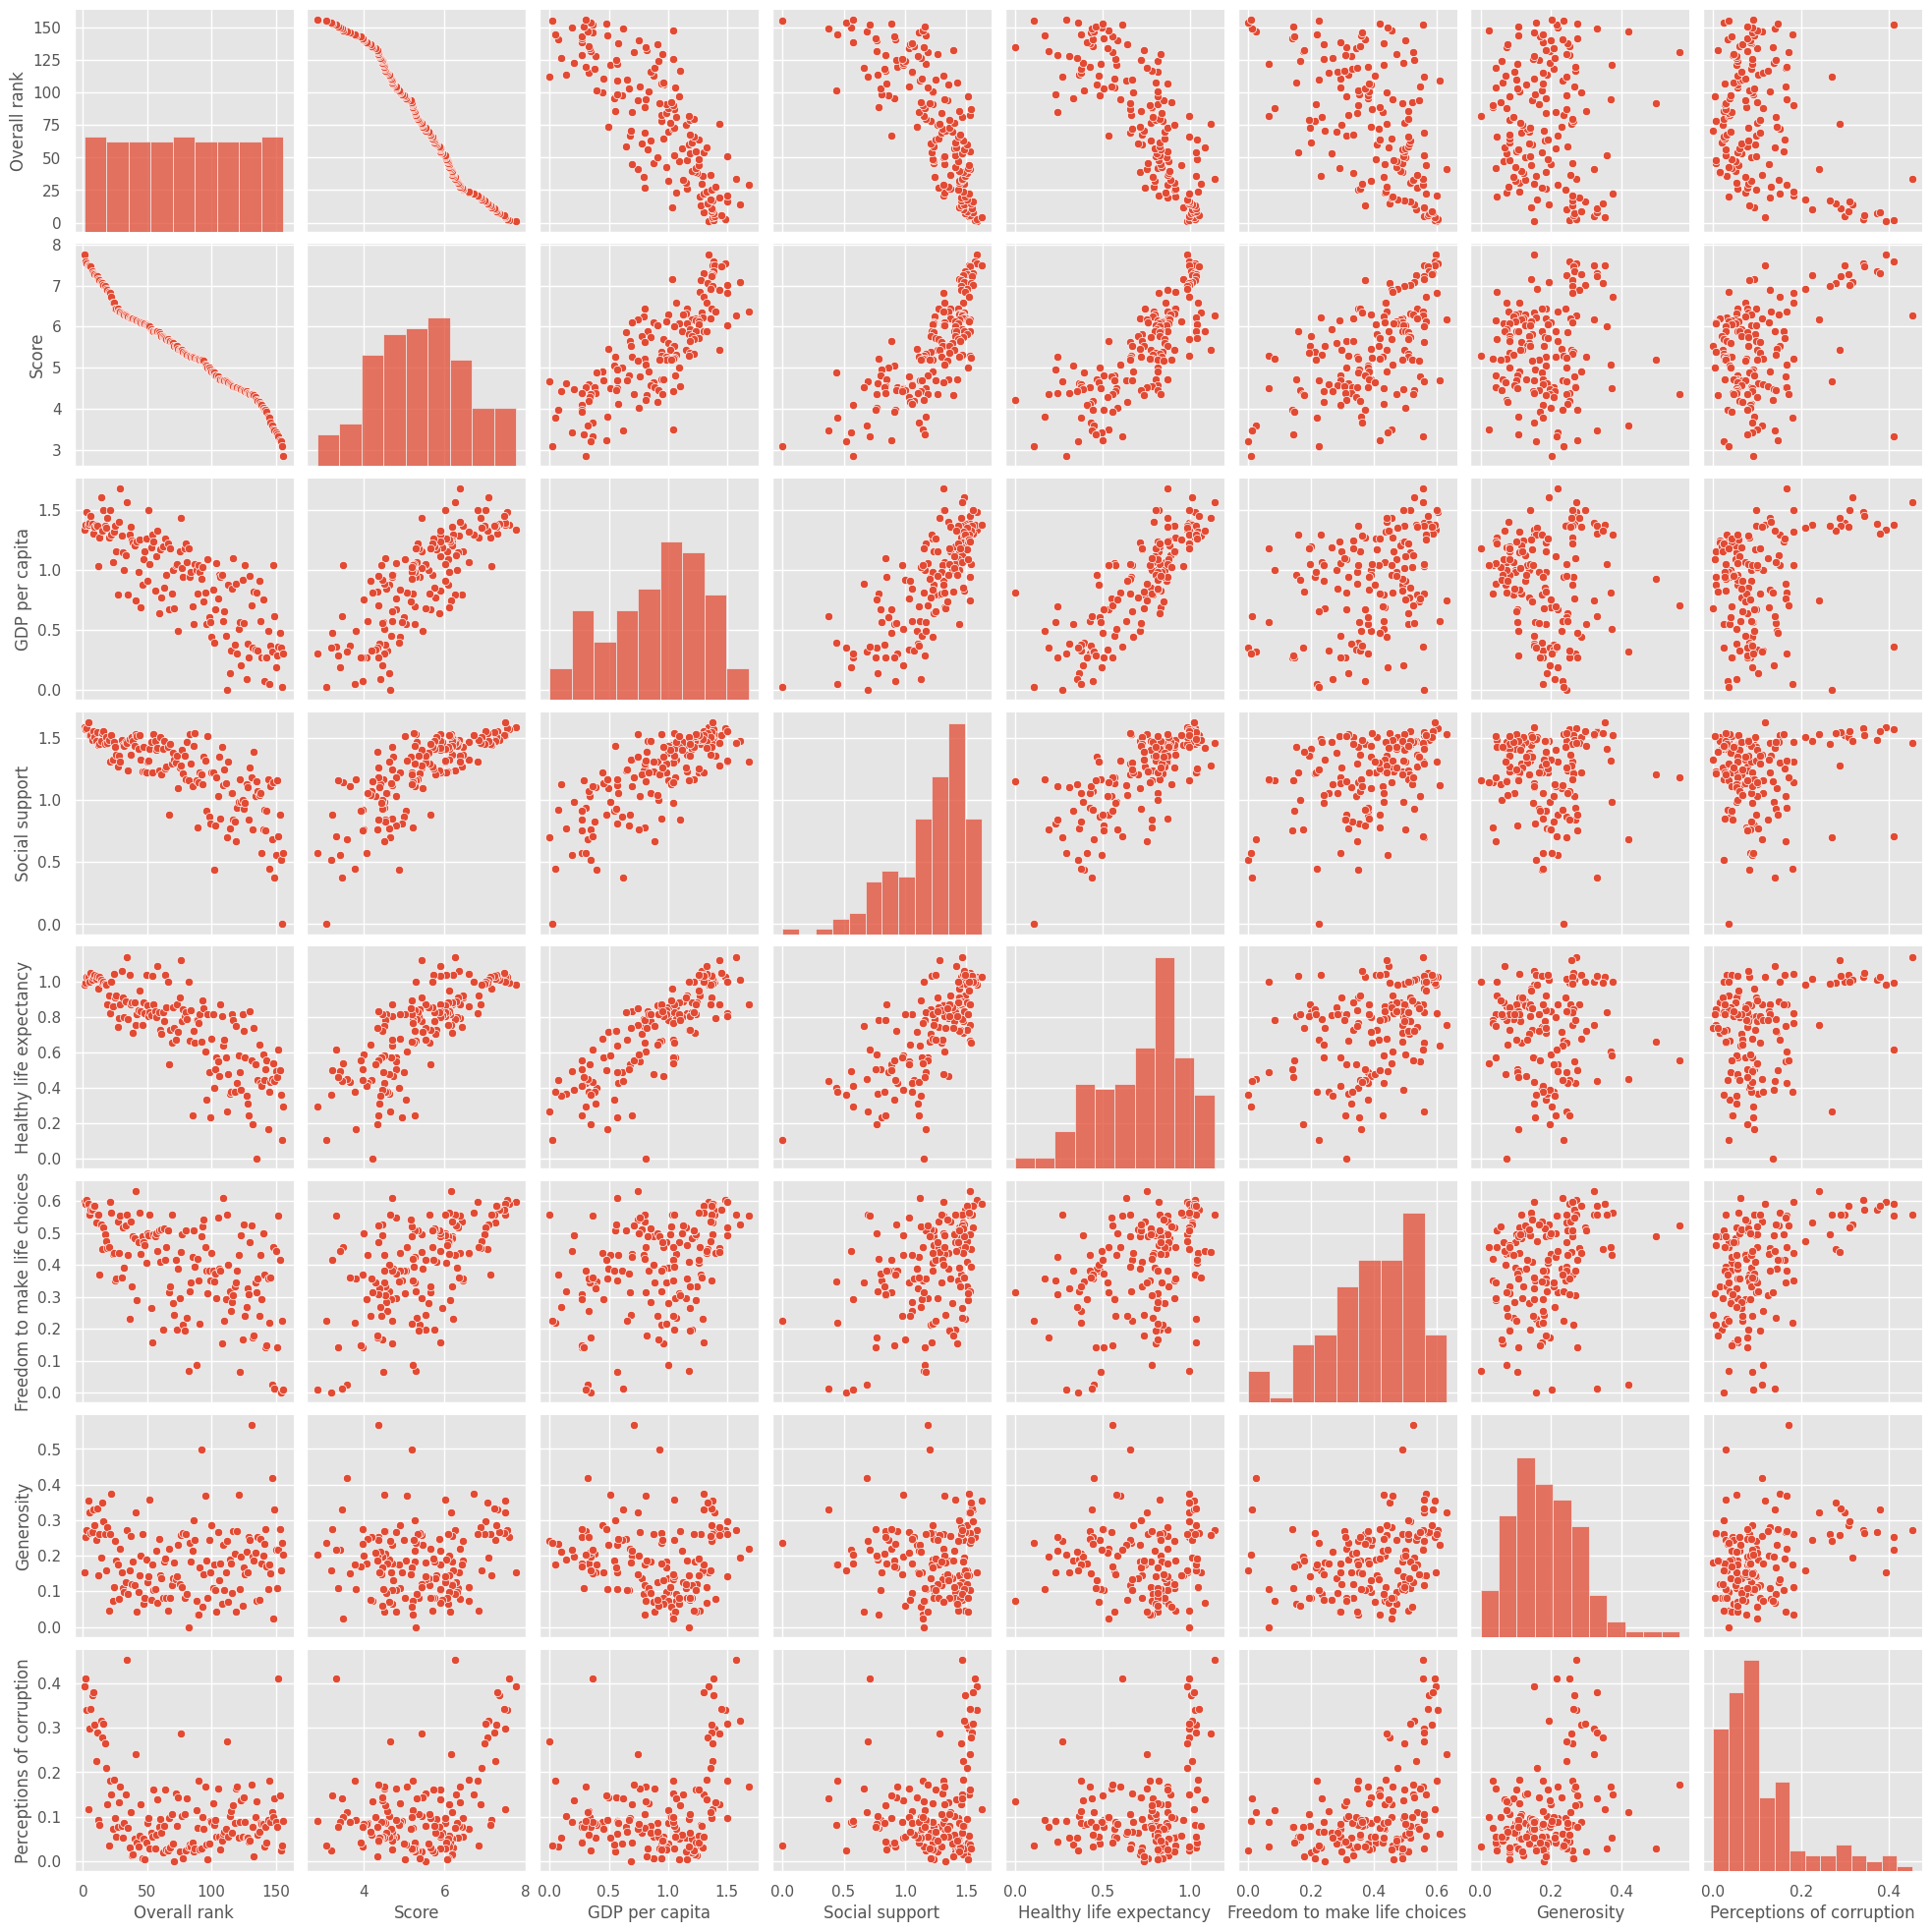

In [ ]:
sns.pairplot(df)

## **3.4 Top 10 countries for each attribute.**

<Axes: xlabel='Perceptions of corruption', ylabel='Country or region'>

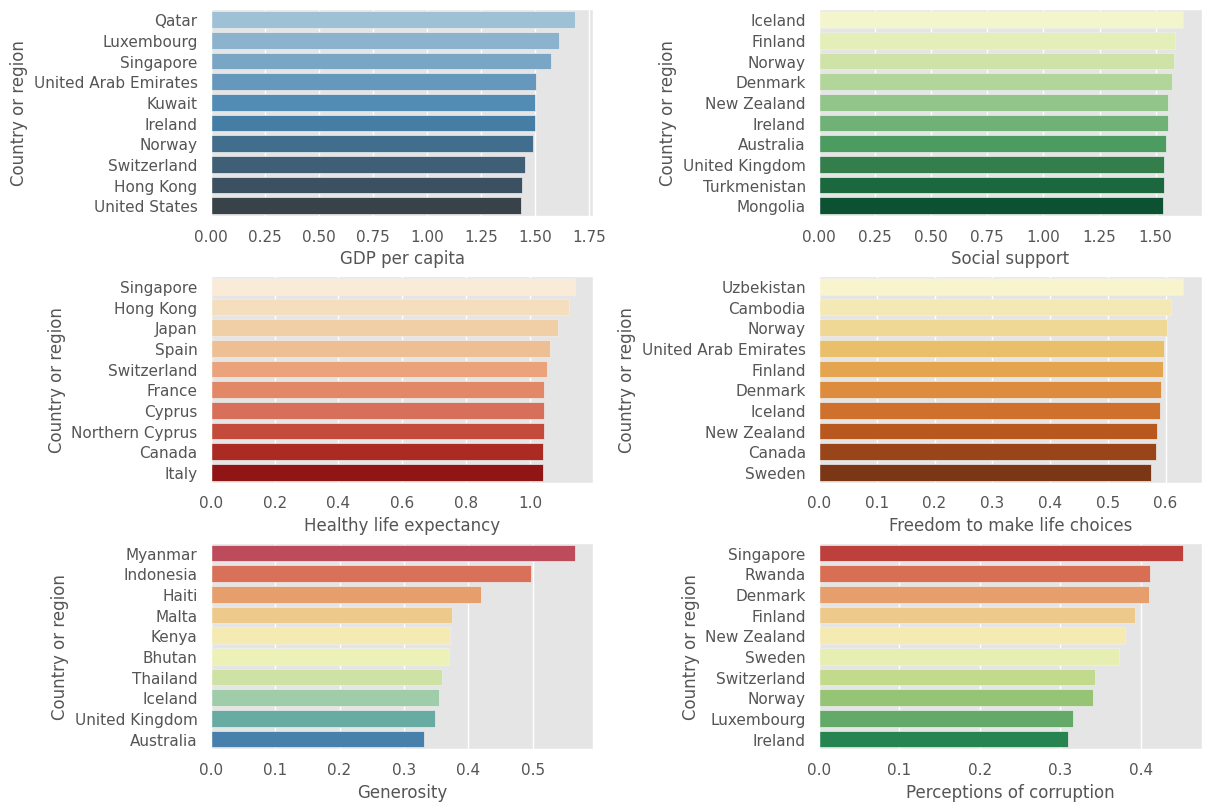

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

sns.barplot(x='Generosity' ,y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[2, 0],palette='Spectral')

sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[2, 1],palette='RdYlGn')

## **3.5 Now I want to give a category to each country as High,Mid and Low according to their happiness scores.Thus we have to find out the bound in which these categories shall lie in.**

In [ ]:
print('max:',df['Score'].max())
print('min:',df['Score'].min())
add=df['Score'].max()-df['Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.769
min: 2.853
range difference: 1.639


In [ ]:
low=df['Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Score'].max())

upper bound of Low grp 4.492
upper bound of Mid grp 6.131
upper bound of High grp max: 7.769


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


**Finally adding a new column Category to the dataset and distributing the levels High,Low,Mid.**

In [ ]:
cat=[]
for i in df.Score:
    if(i>0 and i<low):
        cat.append('Low')


    elif(i>low and i<mid):
         cat.append('Mid')
    else:
         cat.append('High')

df['Category']=cat

## **3.6 Also we will be styling the dataset as a green zone and red zone .If the country belongs to the High category then it is under the green zone and if it is under the Mid is orange and  Low category is going to be the red zone**

In [ ]:
# # assign red, yellow and green according to happiness
# color = (df.Category == 'High' ).map({True: 'background-color: limegreen',False:'background-color: red'})
# df.style.apply(lambda s: color)
# Define the mapping for colors based on the Category column
def assign_colors(category):
    color_map = {
        'High': 'background-color: limegreen',
        'Mid': 'background-color: orange',
        'Low': 'background-color: red'
    }
    return category.map(color_map)

# Apply the color mapping to the DataFrame
df.style.apply(lambda s: assign_colors(df['Category']), axis=0)


## **3.7 Analyzing Combined Features**

**Social Support vs GDP per capita vs Healthy life expectancy**

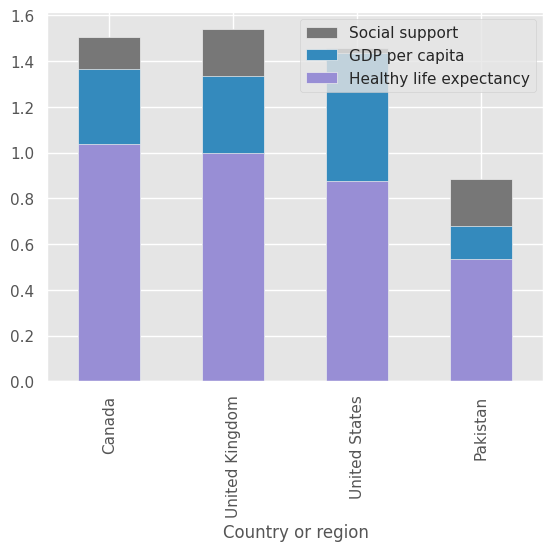

In [ ]:
d= df[(df['Country or region'].isin(['Pakistan','Canada','United Kingdom', 'United States']))]

ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C3')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()


**Freedom to make life choices vs Generosity vs Corruption**

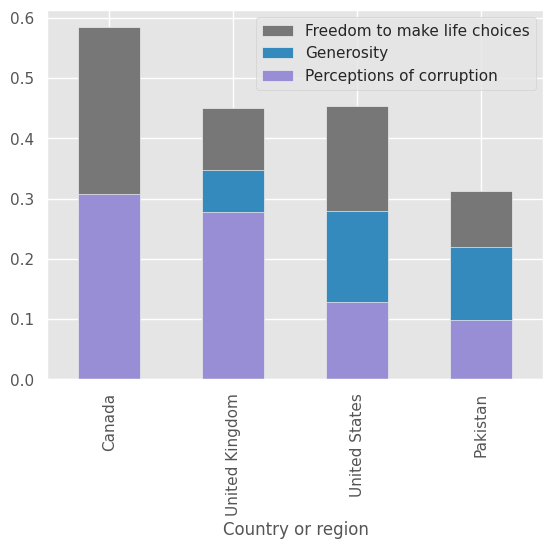

In [ ]:
ax = d.plot(y="Freedom to make life choices", x="Country or region", kind="bar",color='C3')
d.plot(y="Generosity", x="Country or region", kind="bar", ax=ax, color="C1",)
d.plot(y="Perceptions of corruption", x="Country or region", kind="bar", ax=ax, color="C2",)

plt.show()

**Geographic Visualization of Happiness Score**

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth',
           locations = df['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'],
           text = df['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# **4. Exploratory Data Analysis**

## **4.1 Exploratory Data Analysis For Year 2019**

### **4.1.1 Univariate Analysis**

In [ ]:
df1 = original

Univariate analysis focuses on analyzing each feature in the dataset independently.


*   **Distribution analysis:** The distribution of each feature is examined to identify its shape, central tendency, and dispersion
*   **Identifying potential issues:** Univariate analysis helps in identifying potential problems with the data such as outliers, skewness and missing values

#### **4.1.1.1 Steps of doing Univariate Analysis on Numerical columns**

**Descriptive Statistics:** Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

**Visualizations:** Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

**Data Imbalances**

**Identifying Outliers:** Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

**Skewness:** Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

**Conclusion:** Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#### **4.1.1.2 Numerical Variables**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
for col in df1.columns:
  if df[col].dtype == 'float64' or df[col].dtype == 'int64':
    print(col)

Overall rank
Score
GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption


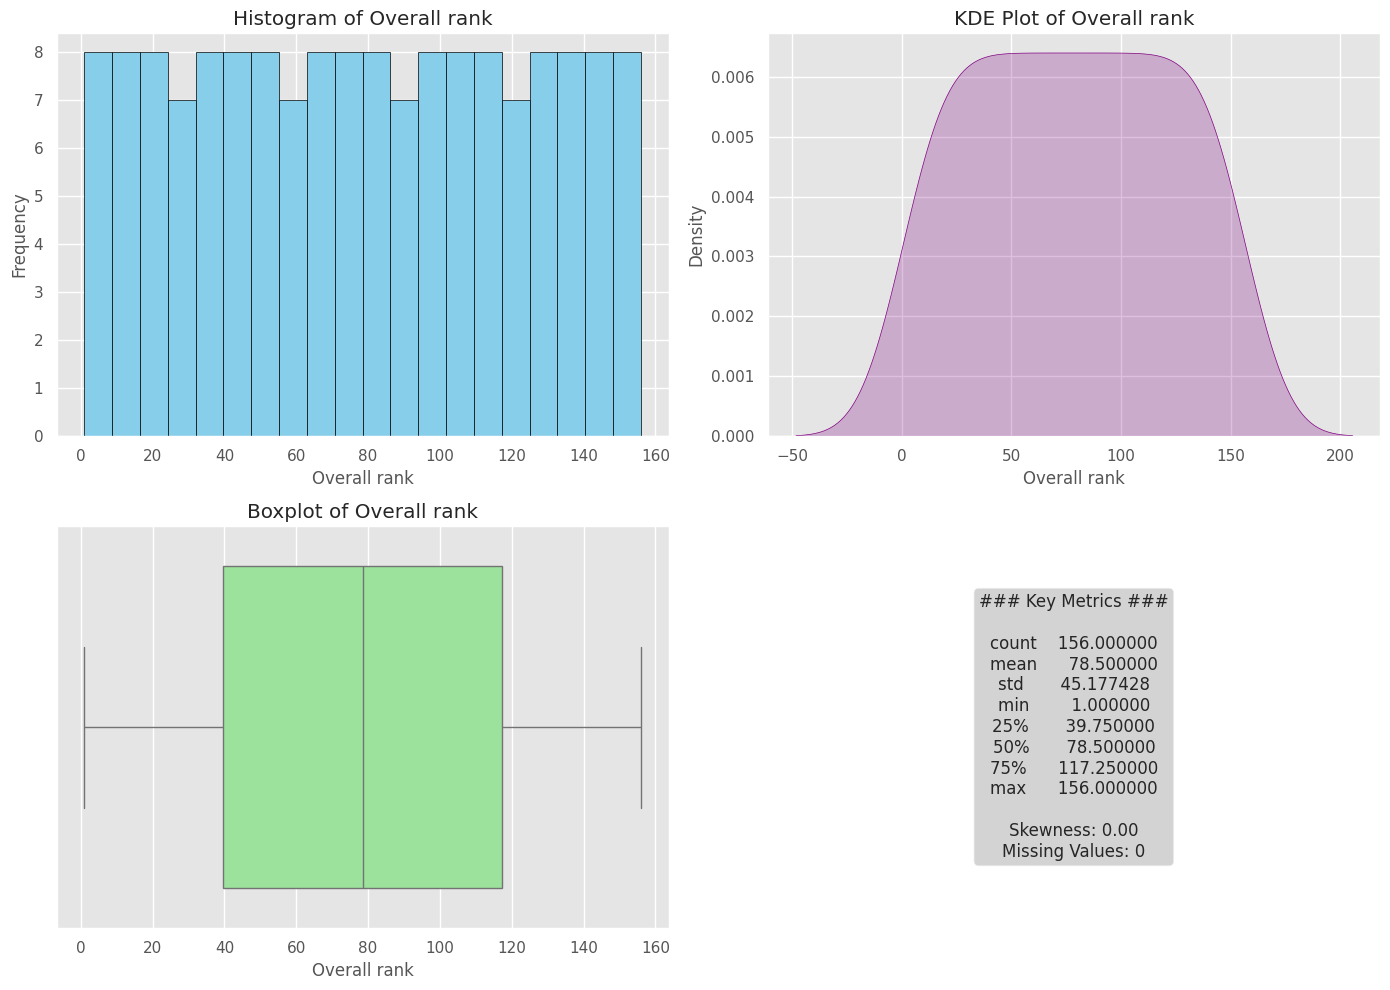

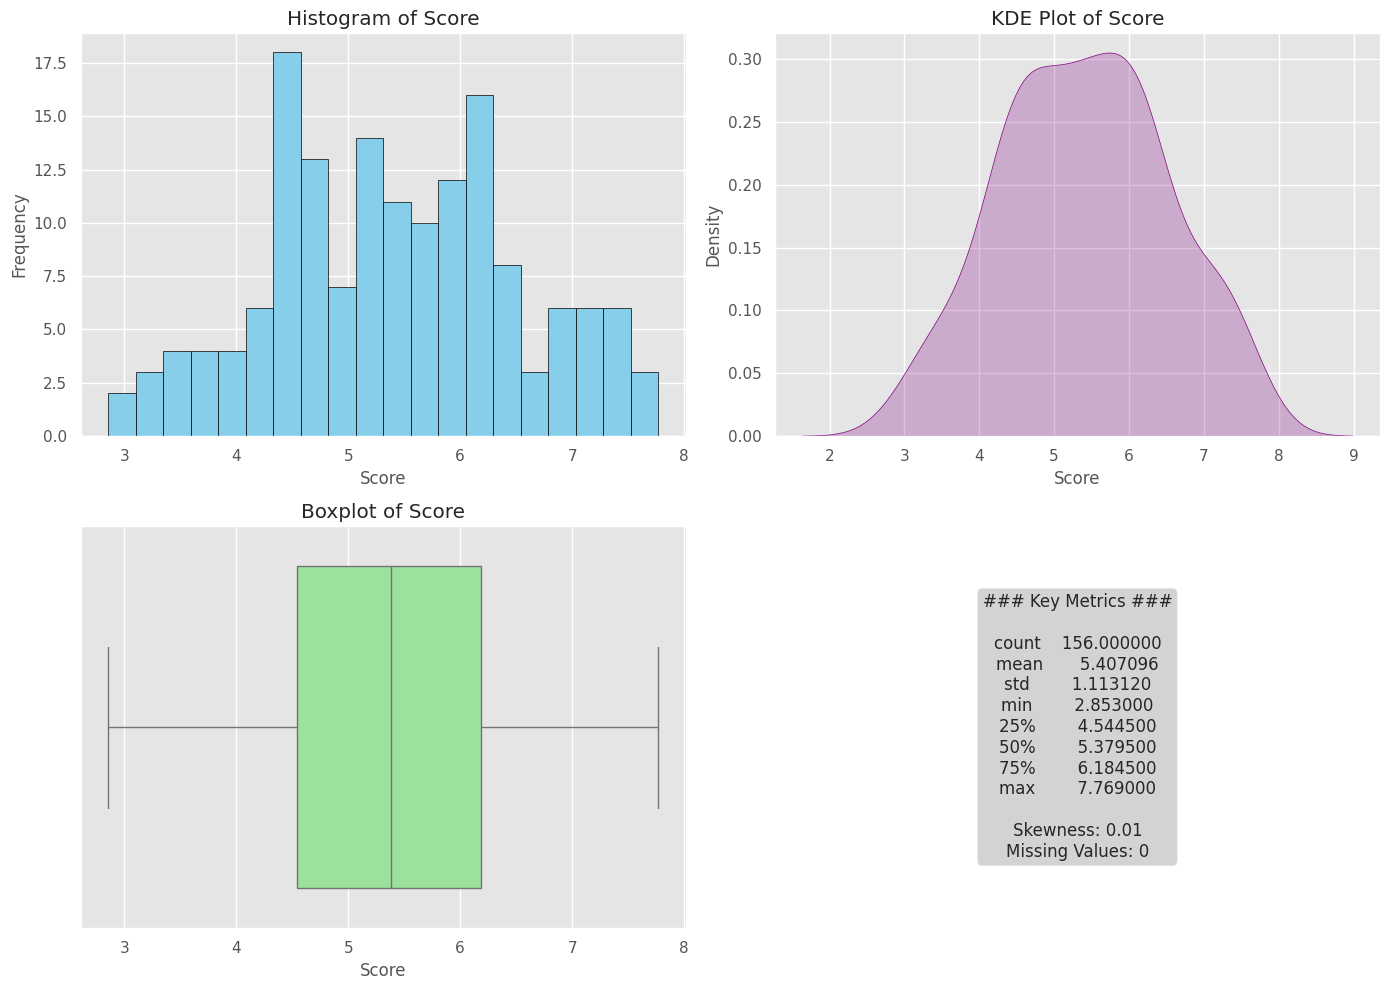

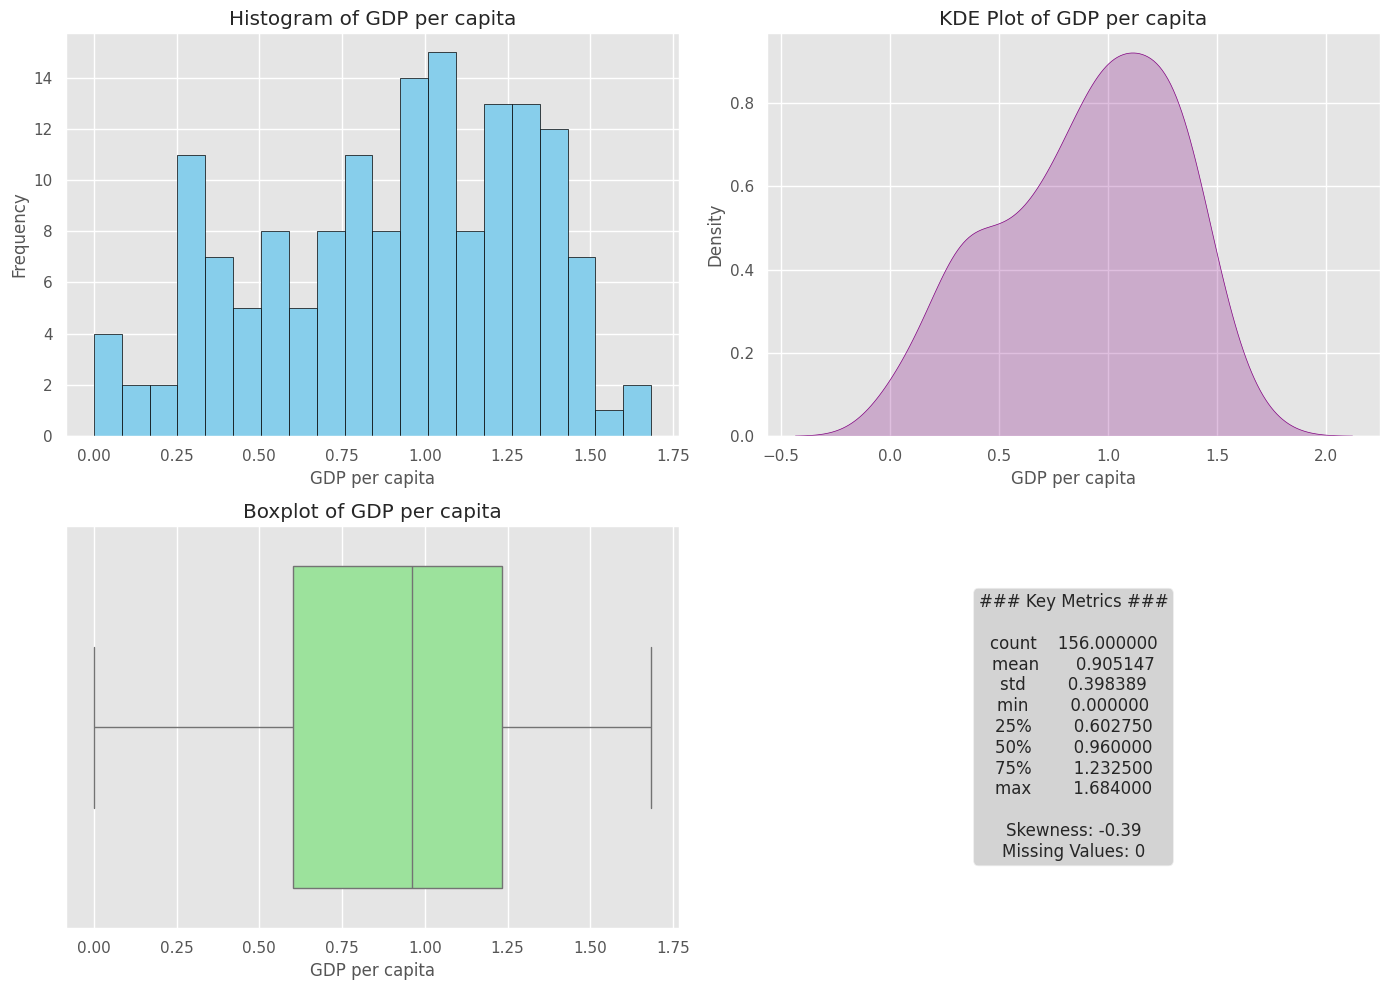

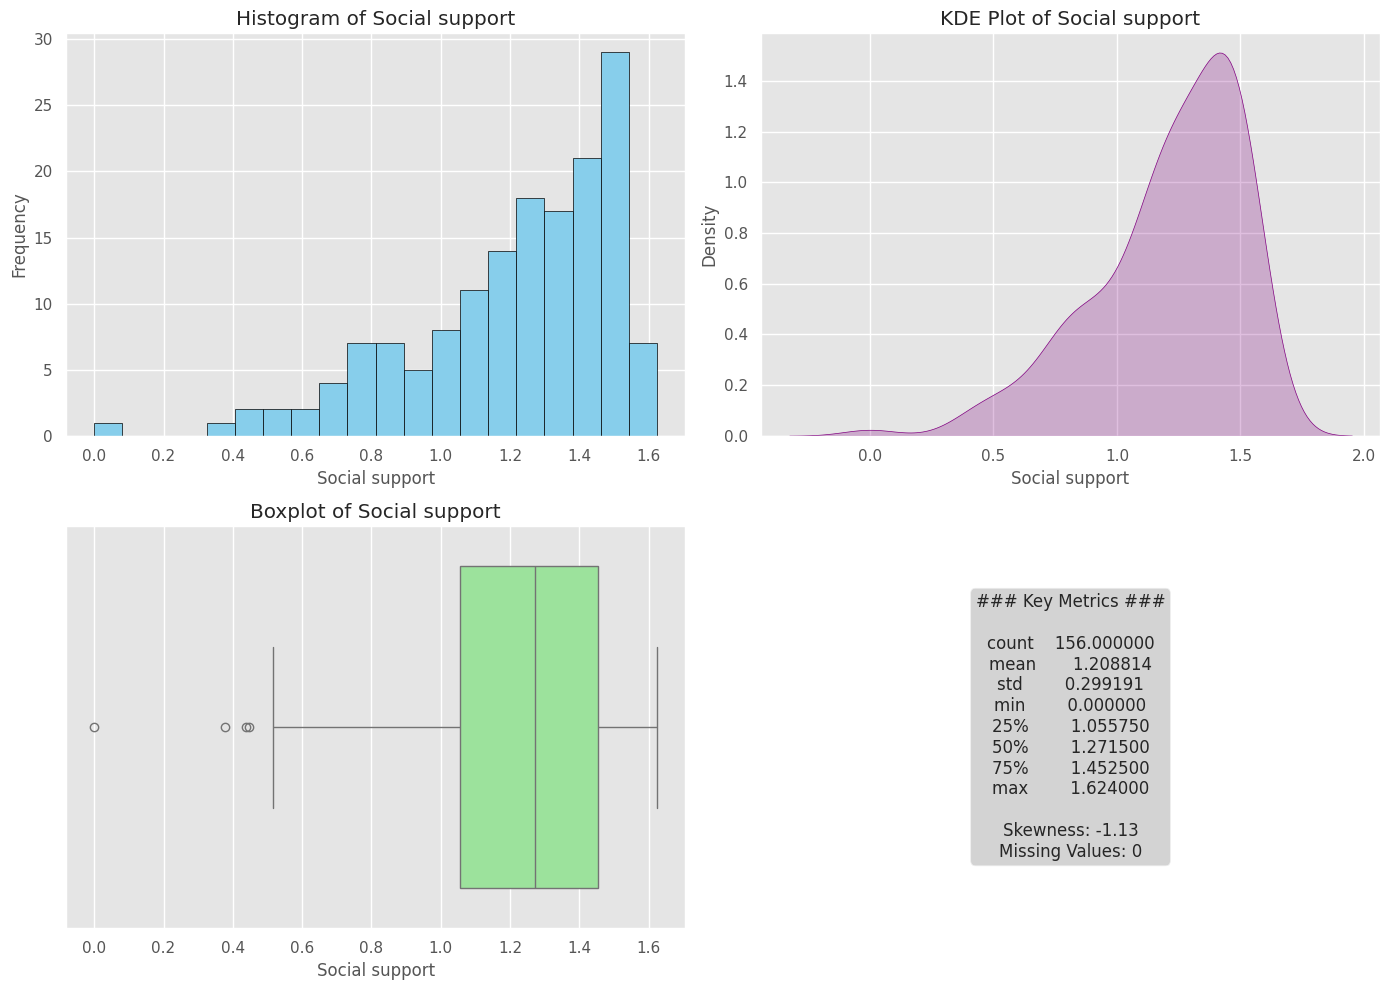

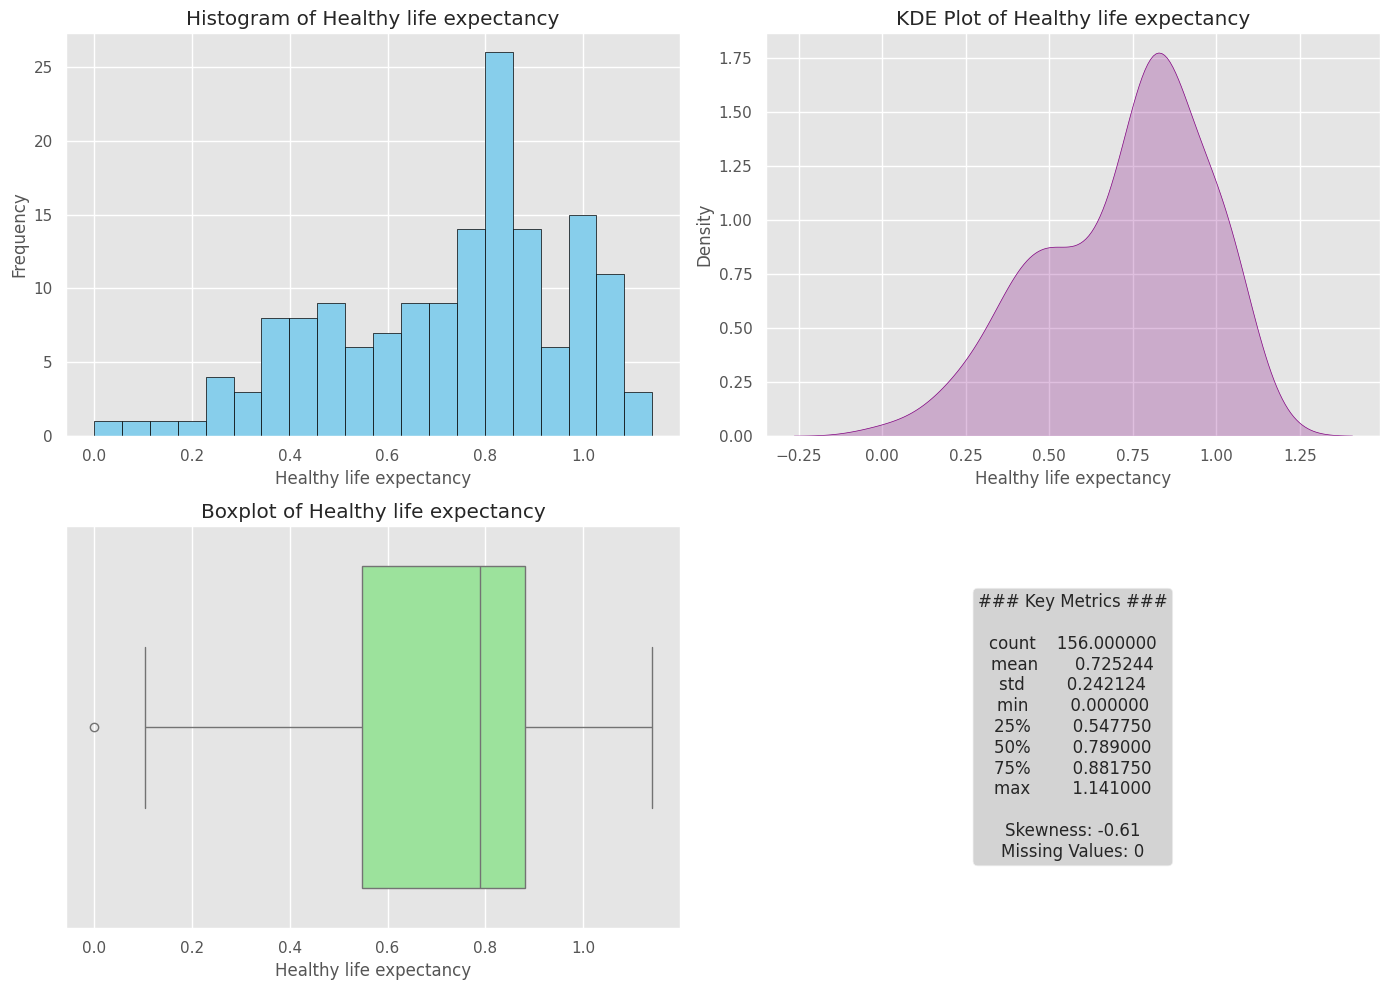

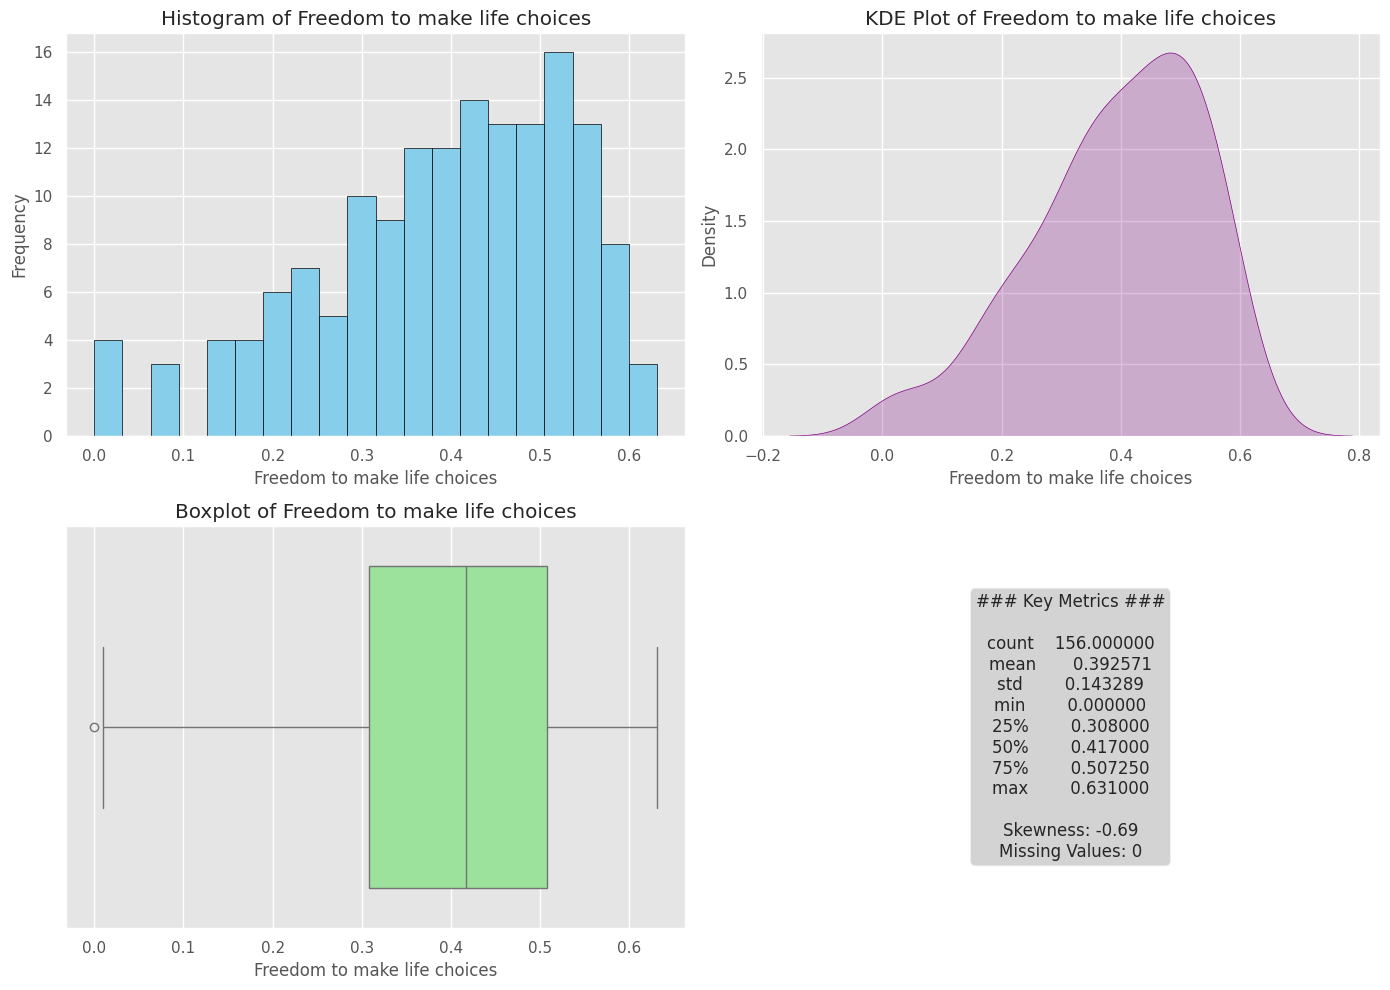

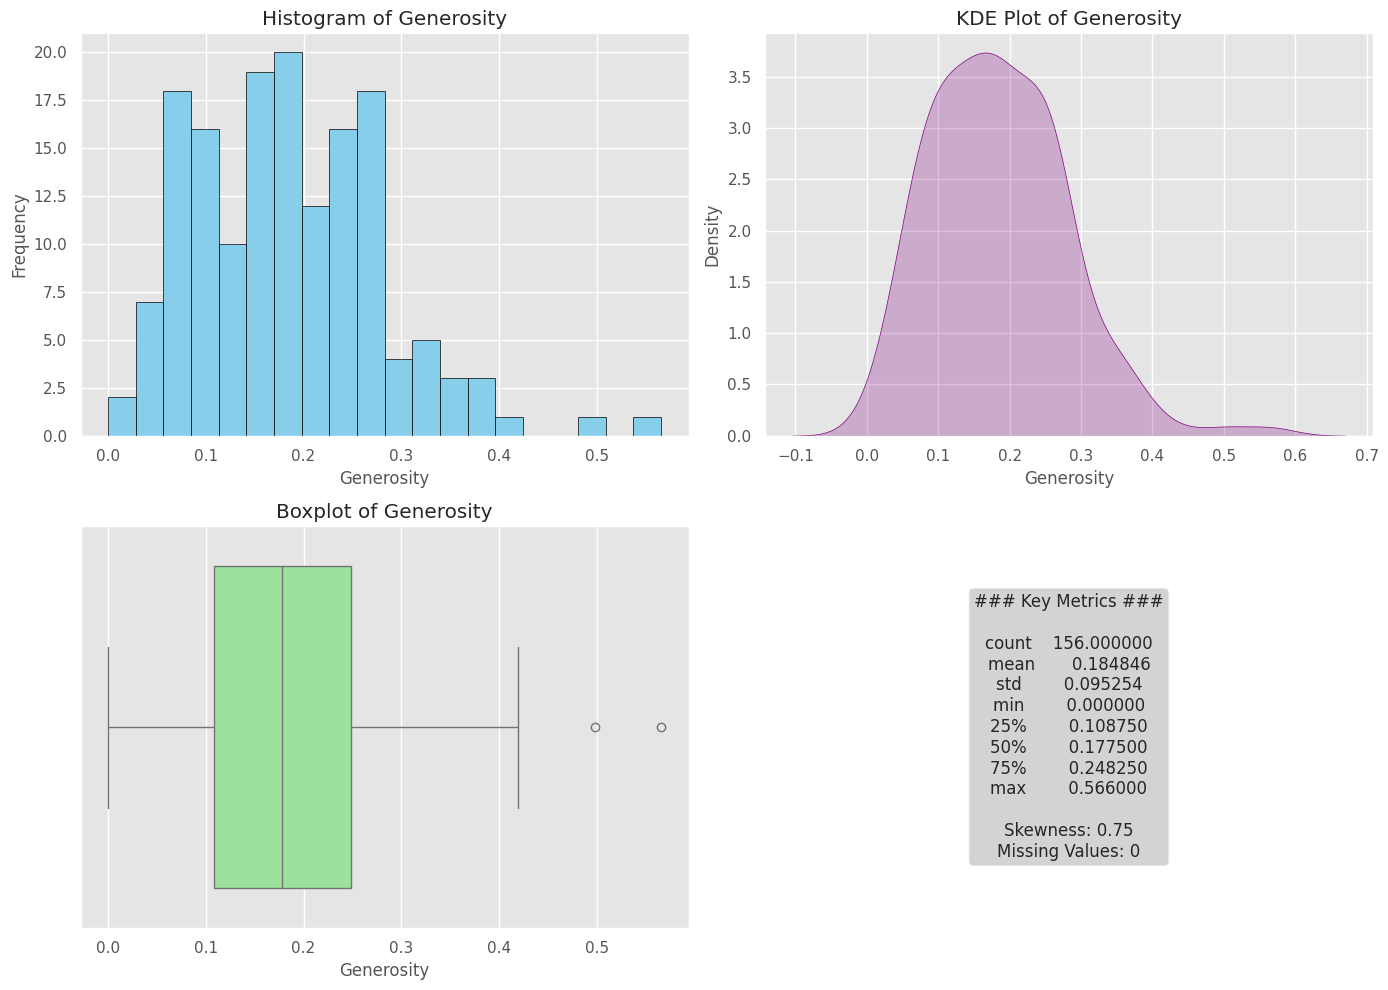

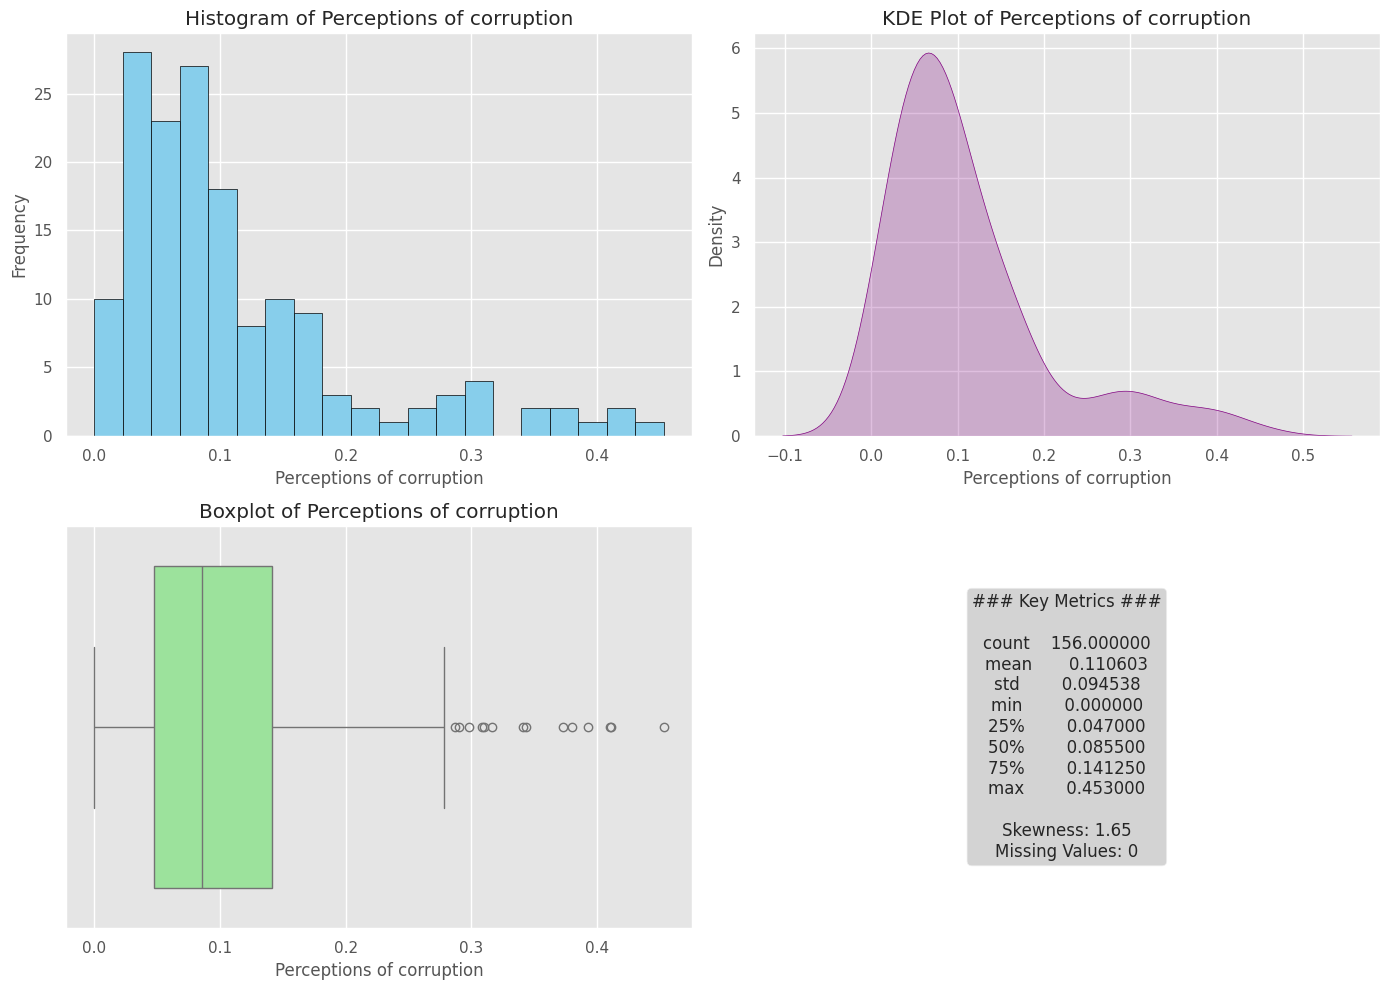

In [ ]:
for col in df1.columns:
  if df[col].dtype == 'float64' or df[col].dtype == 'int64':
    analyze_numerical_feature(df1, col)

In [ ]:
df['Category'].unique()

array(['High', 'Mid', 'Low'], dtype=object)

#### **4.1.1.3 Categorical Variables**

**The only categorical variable in the dataset is country or region. The second categorical variable category is introduced by me to distinguish between the high, mid and low happy score countries**

### **4.1.2 Bivariate Analysis**

#### **4.1.2.1 Steps of doing Bivariate Analysis**

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots. Scatterplots are not as much beneficial<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps


#### **4.1.2.2 First Type: Numerical-Numerical**

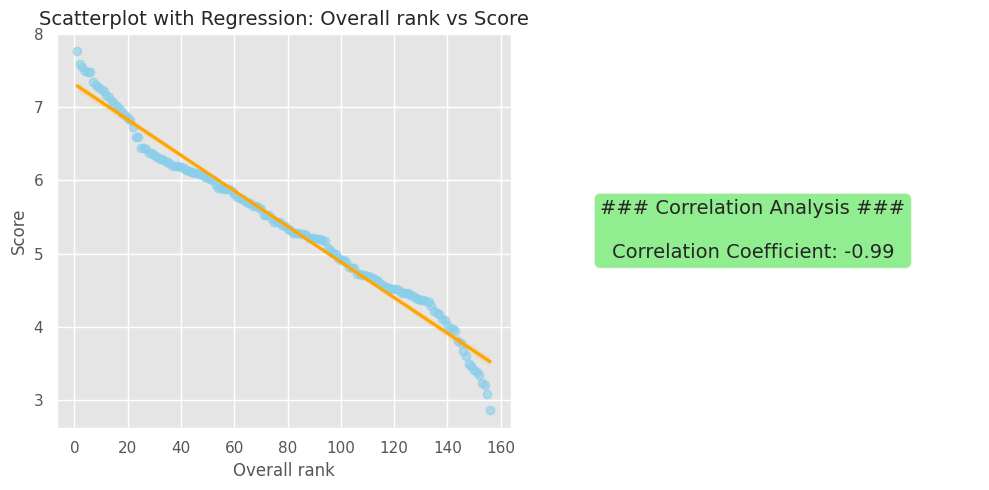

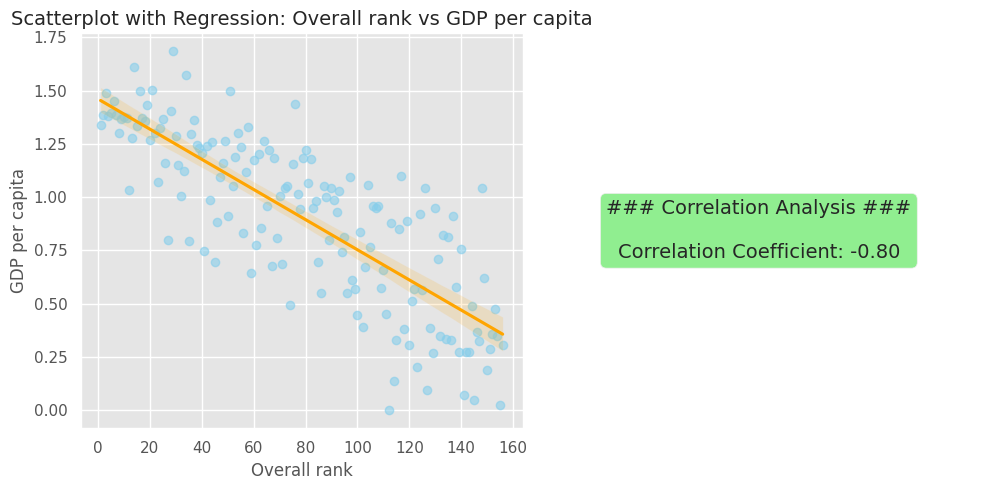

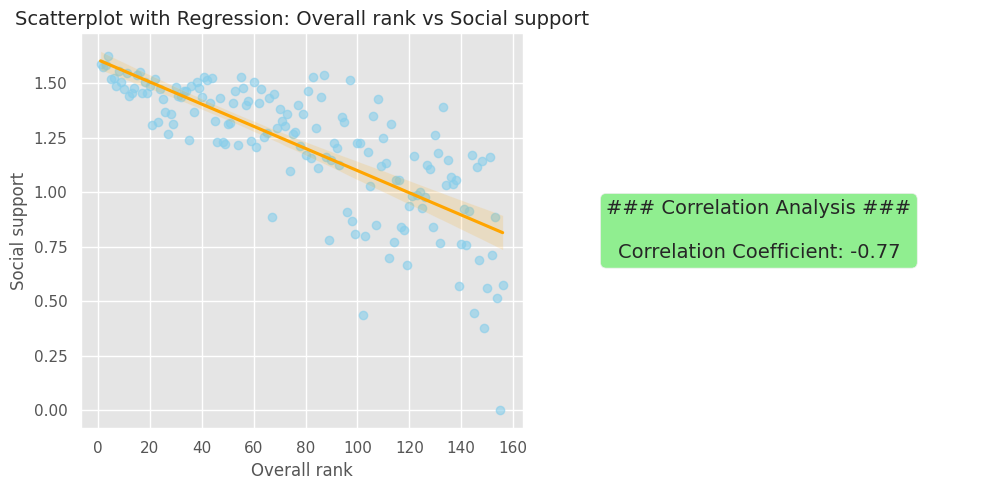

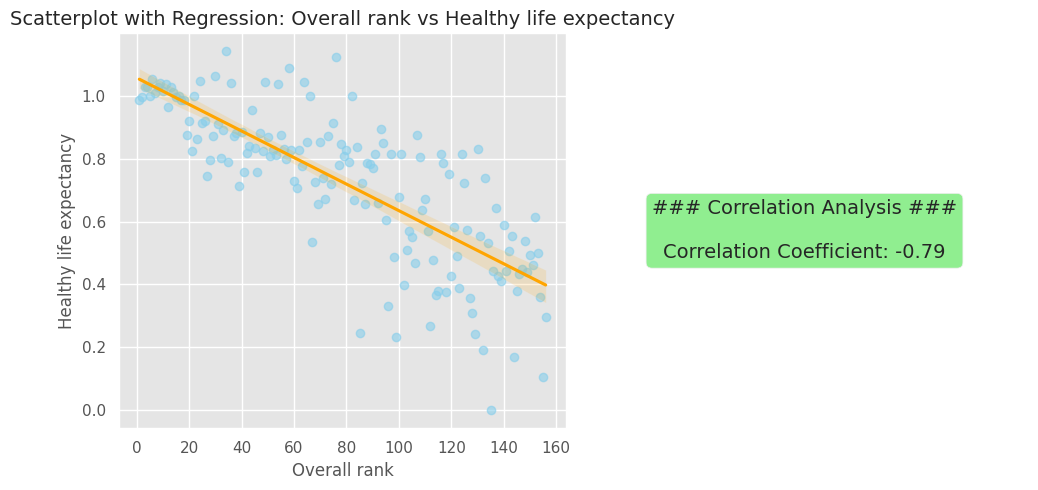

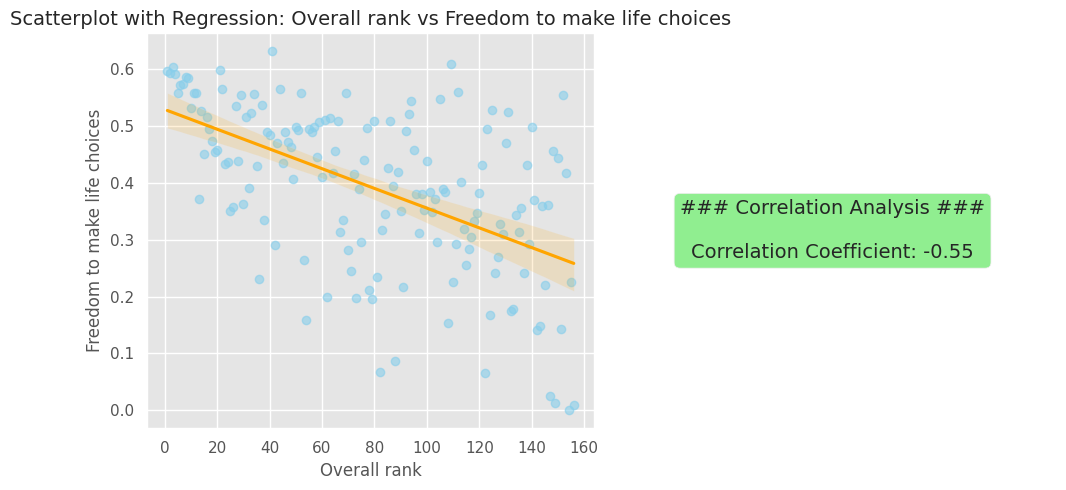

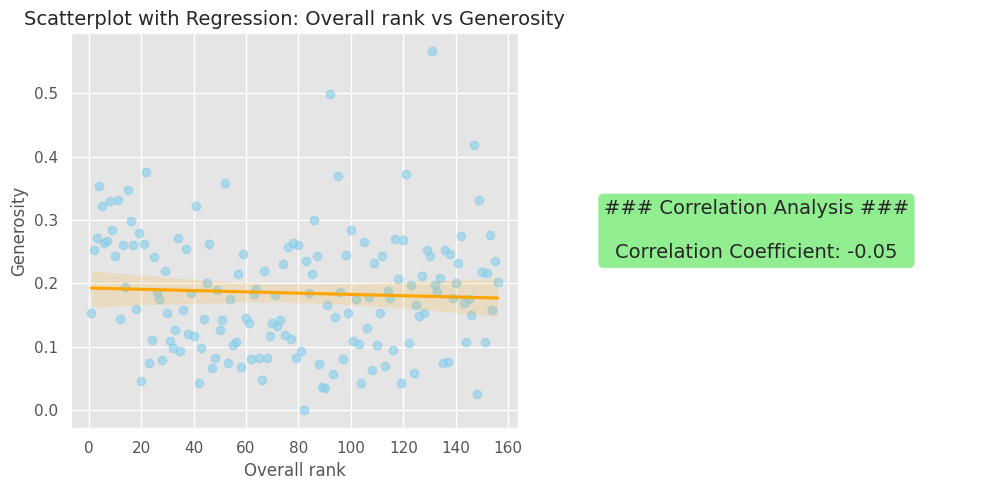

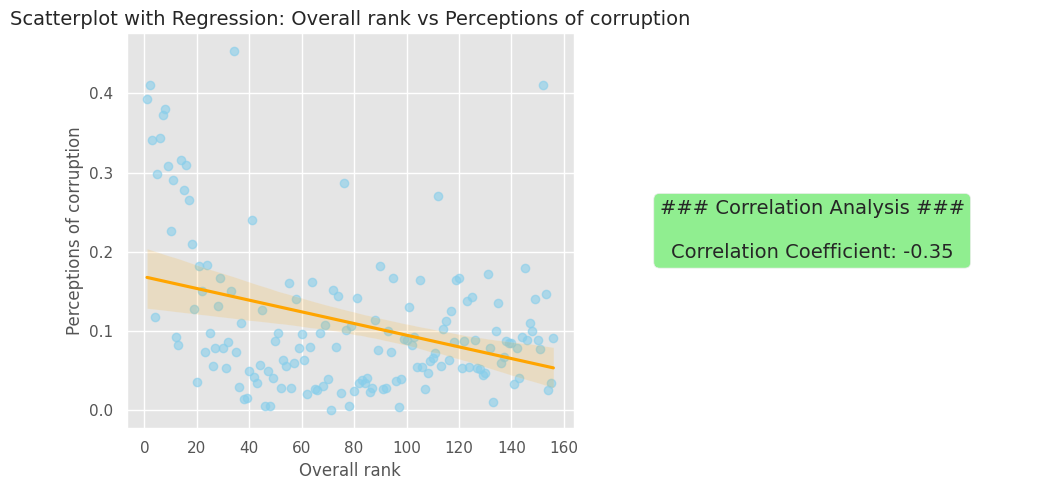

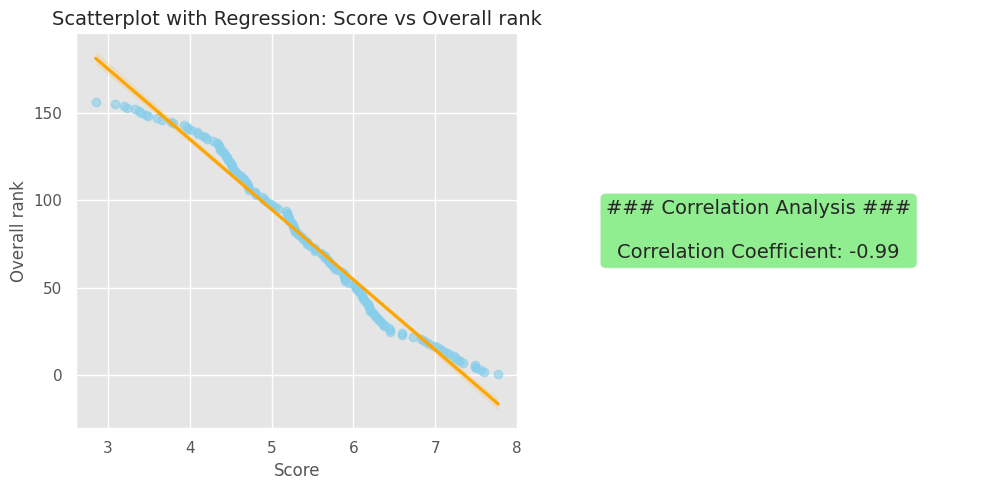

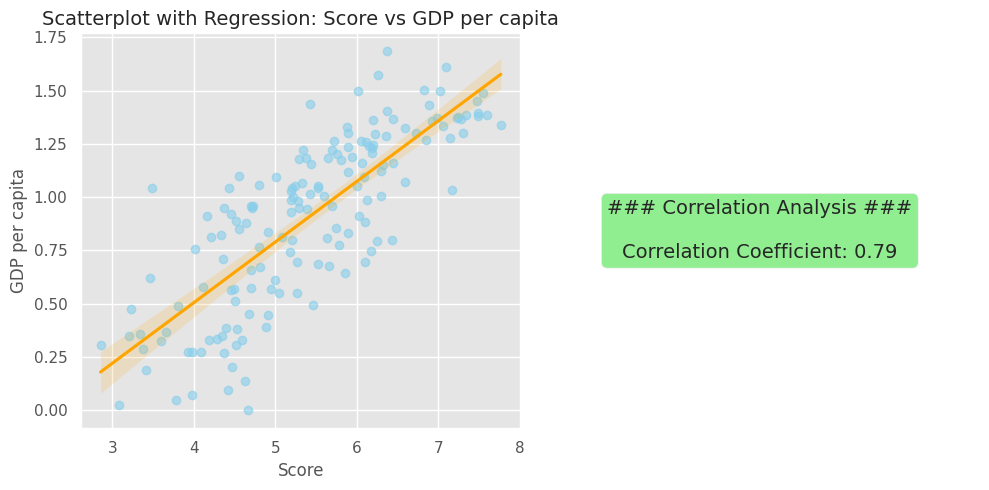

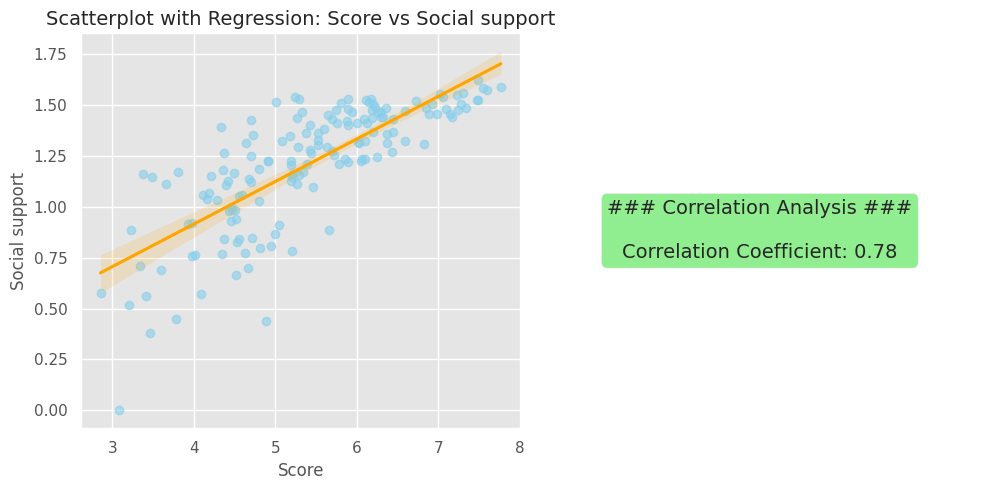

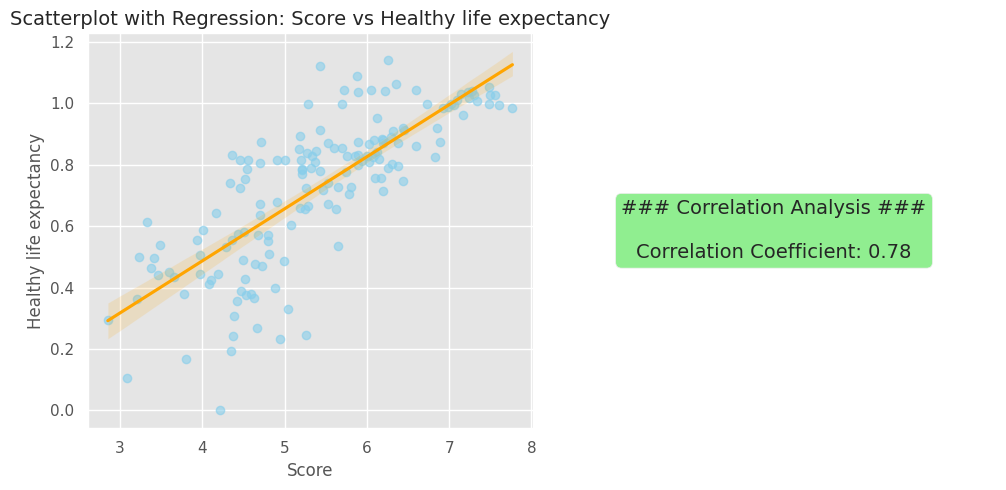

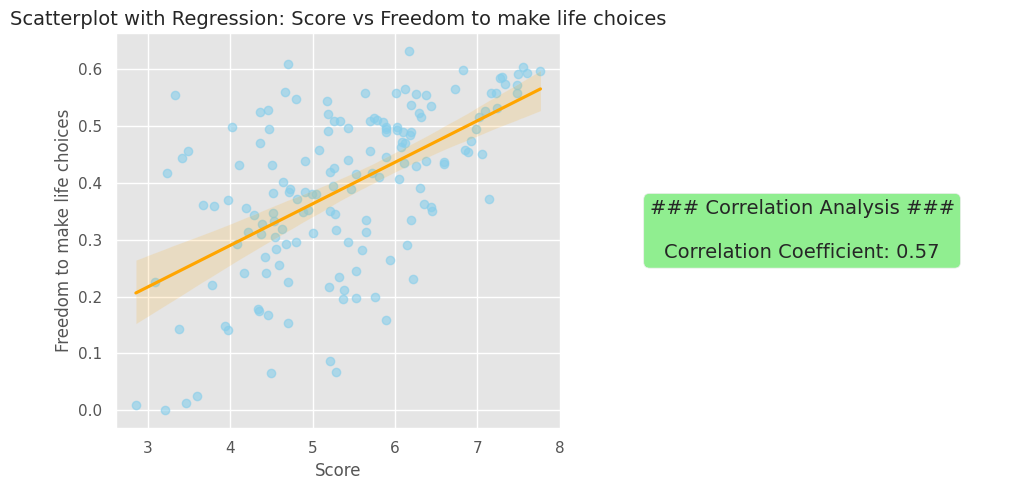

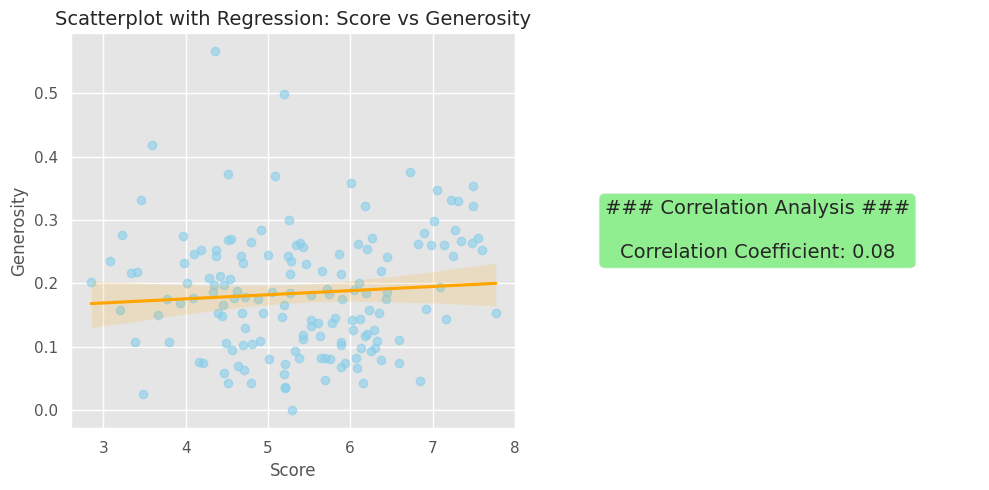

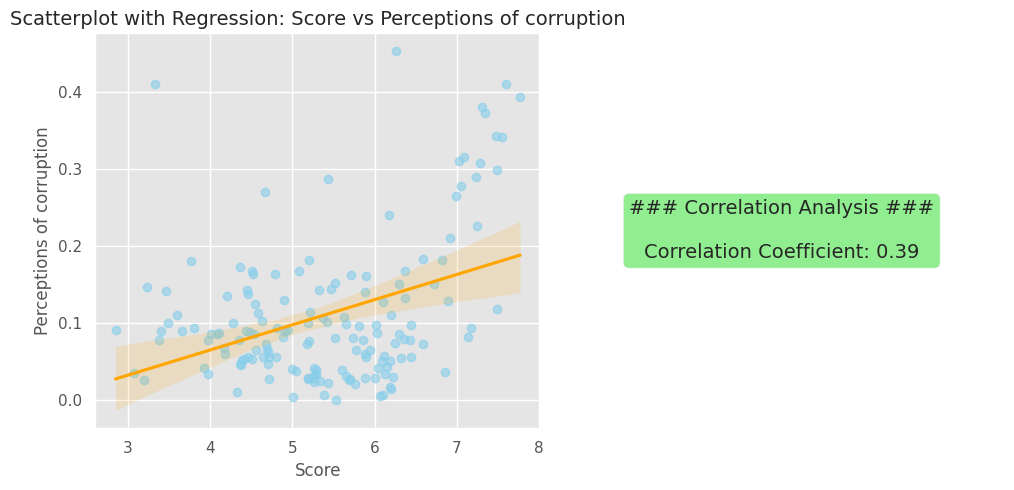

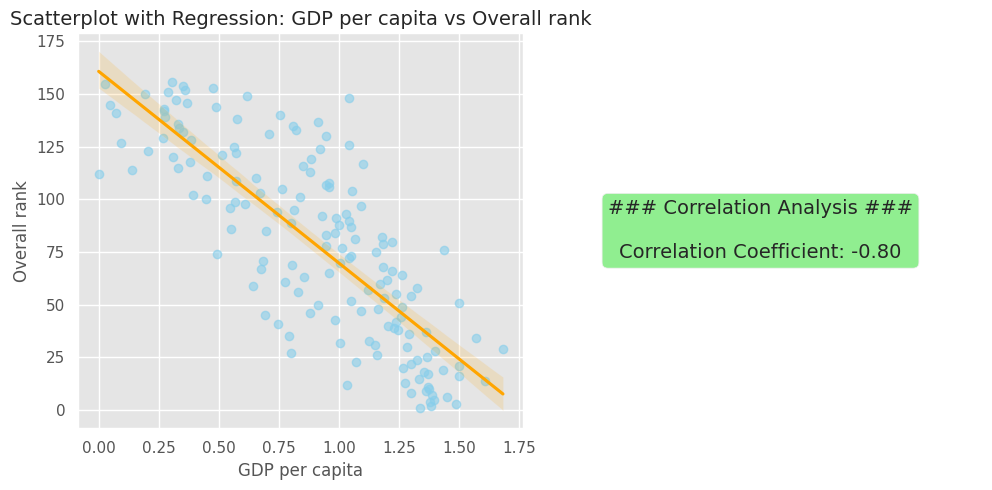

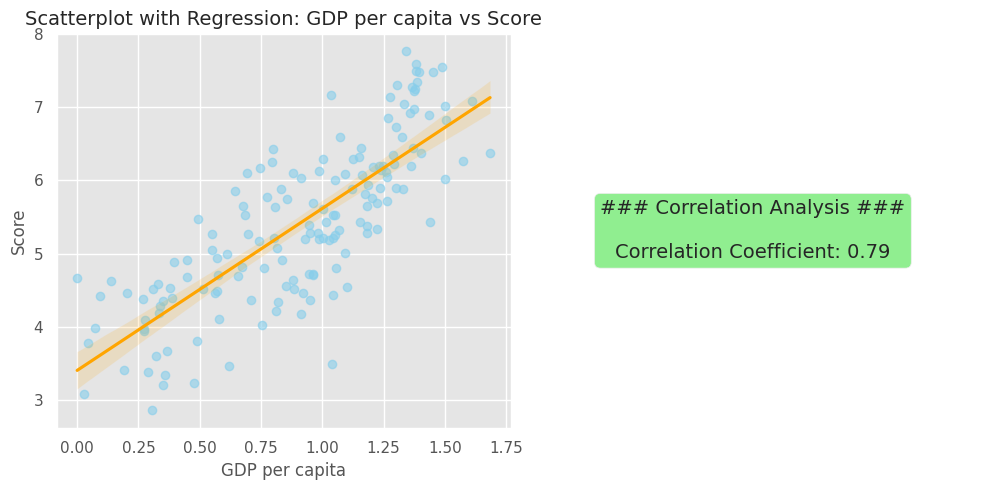

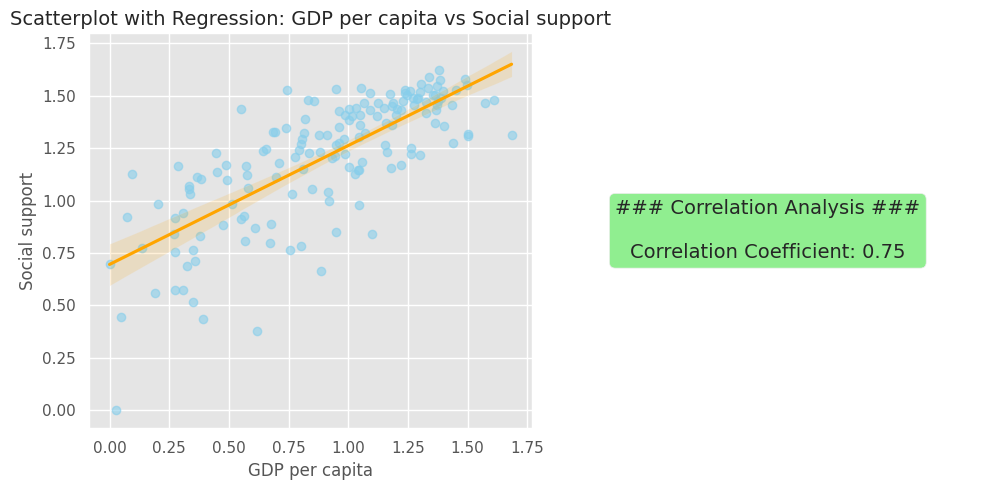

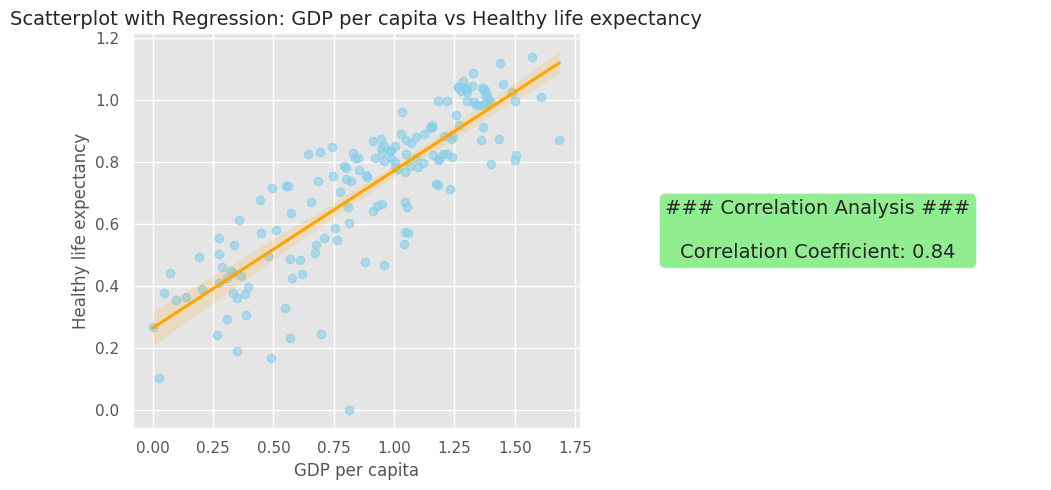

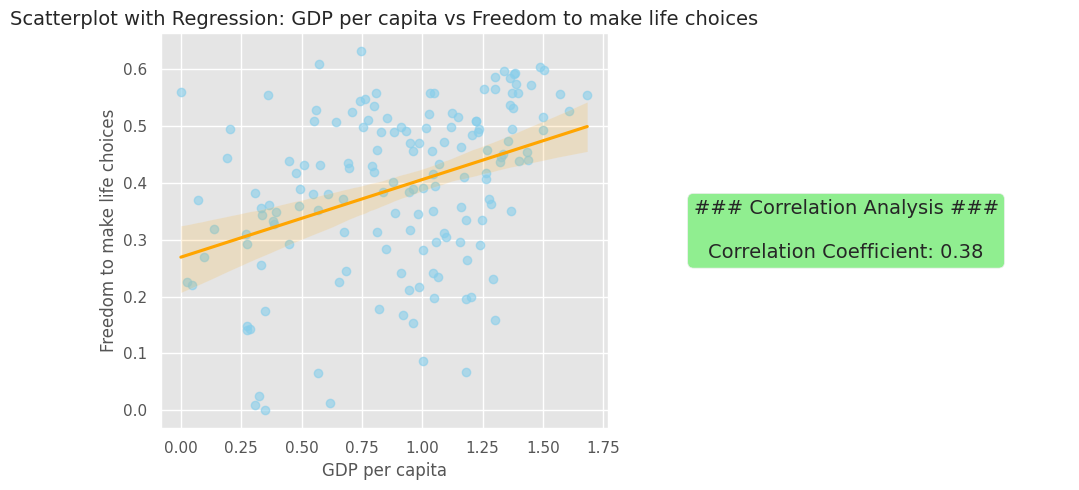

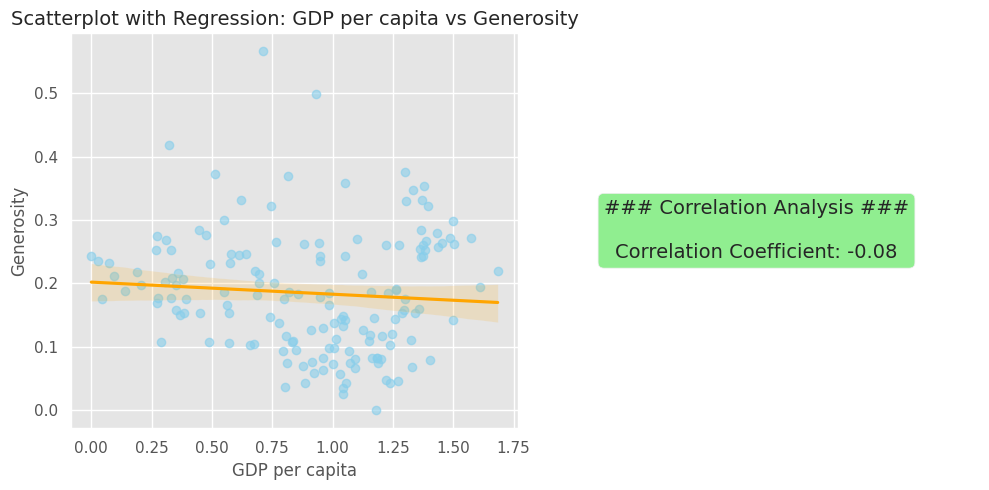

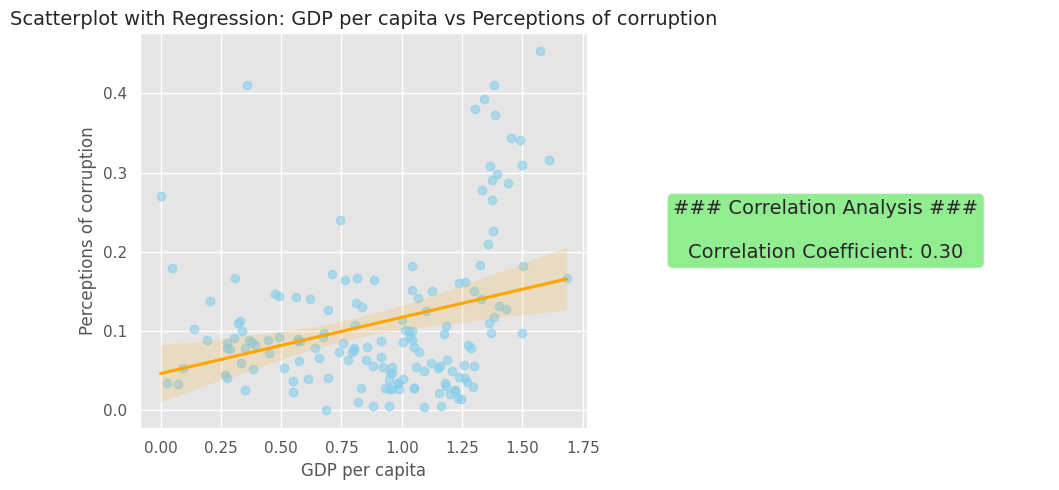

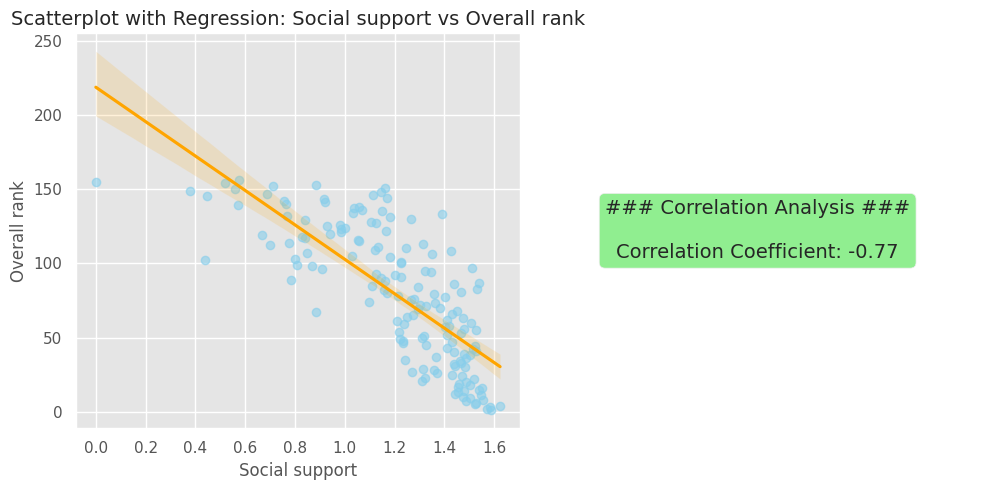

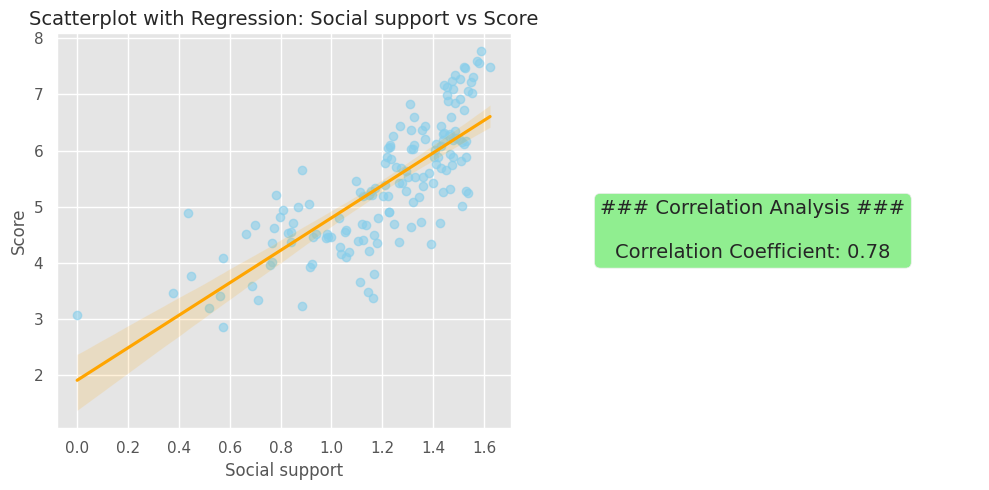

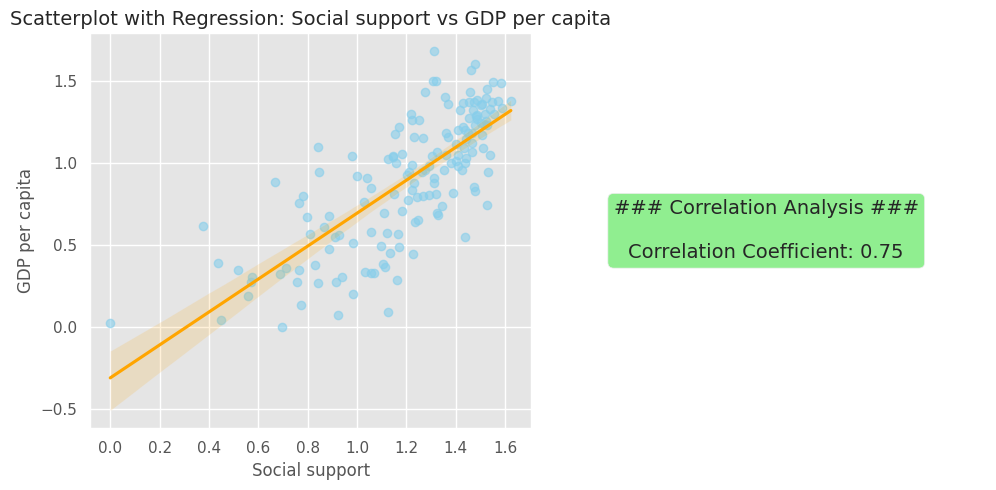

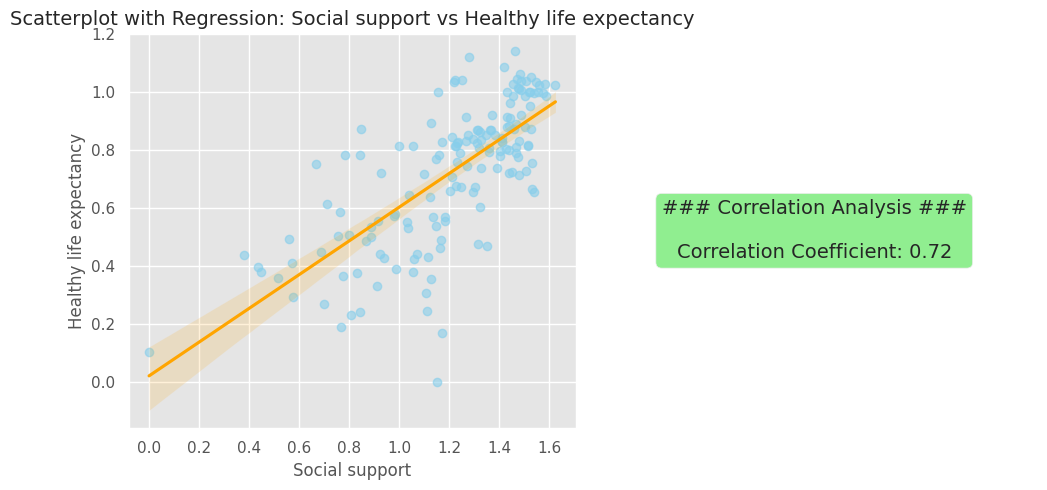

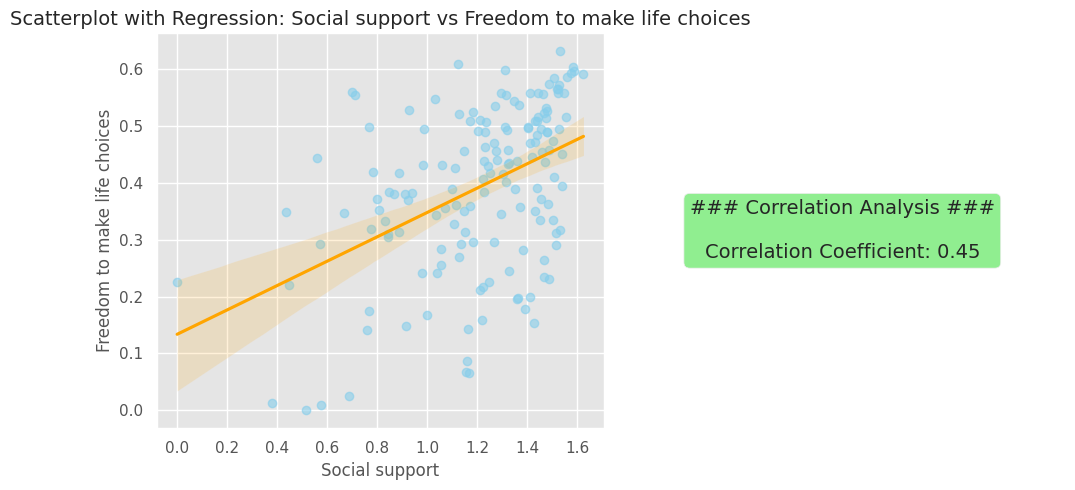

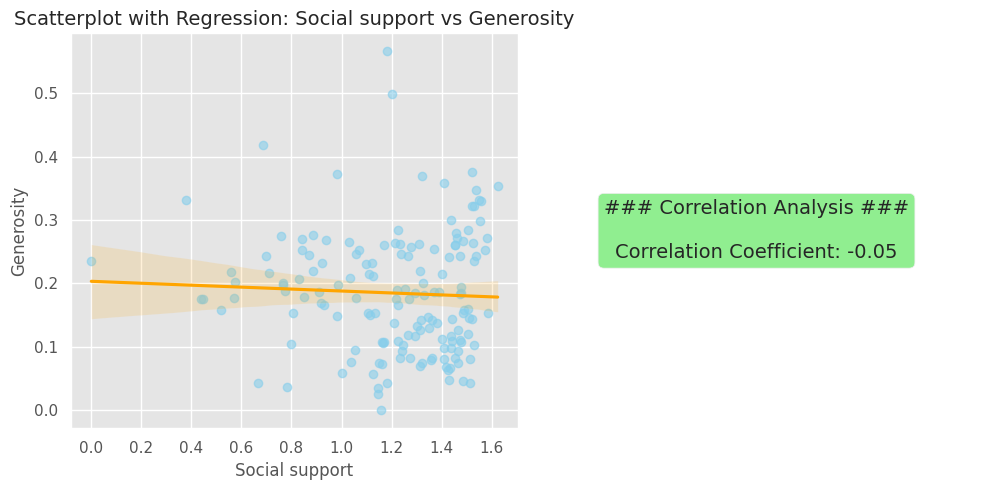

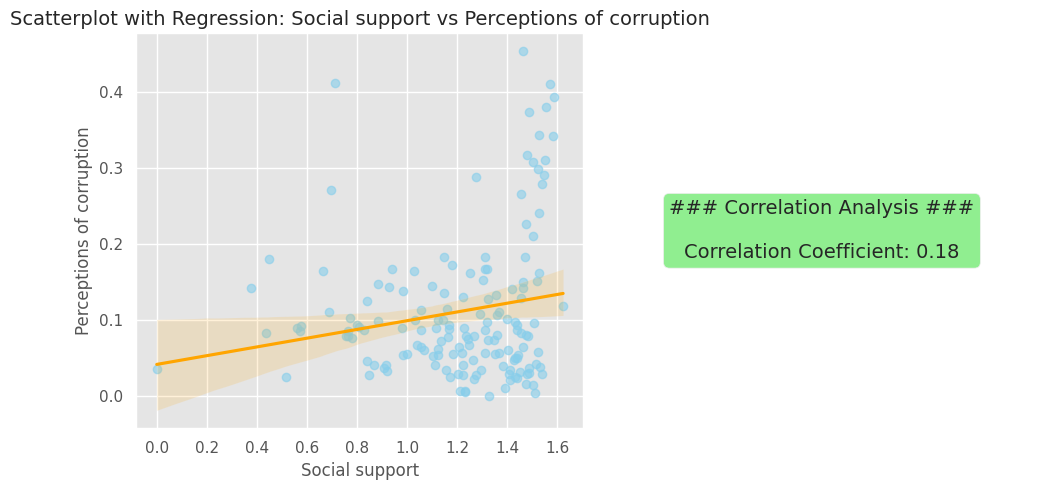

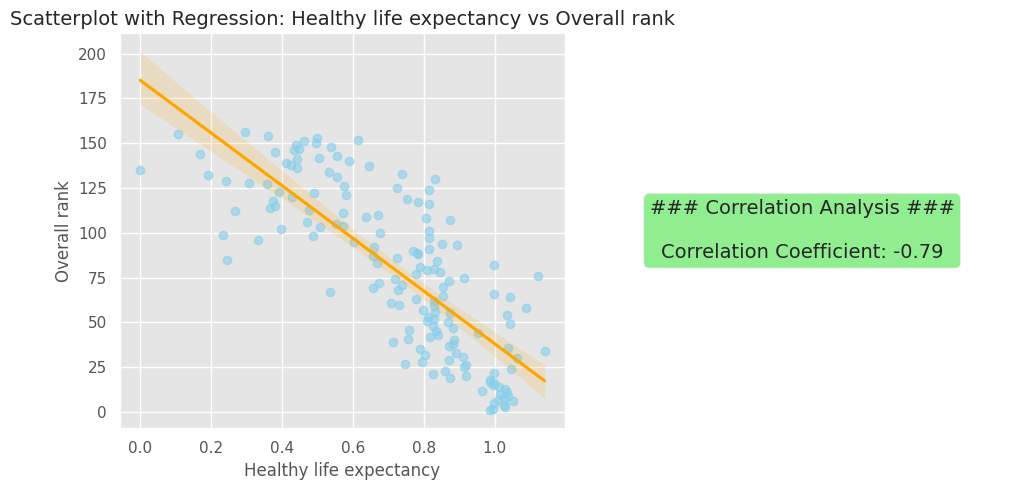

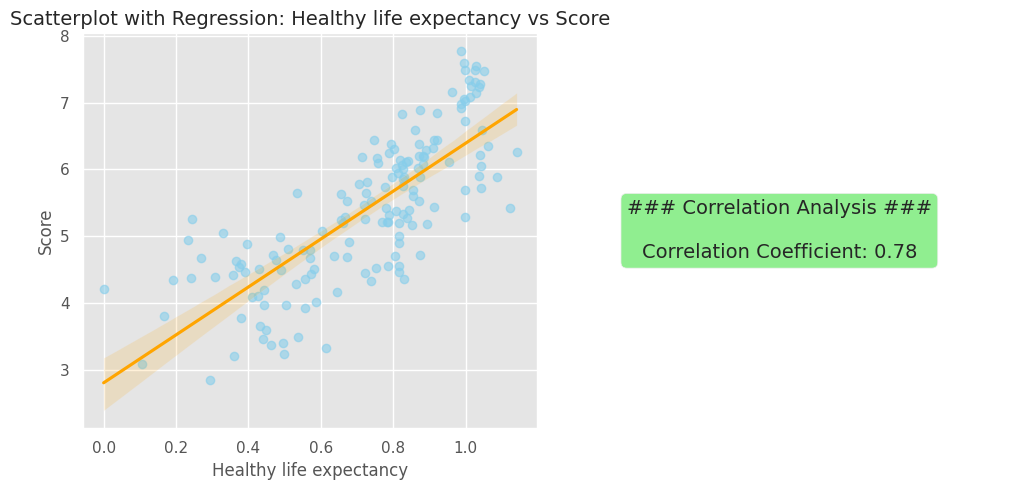

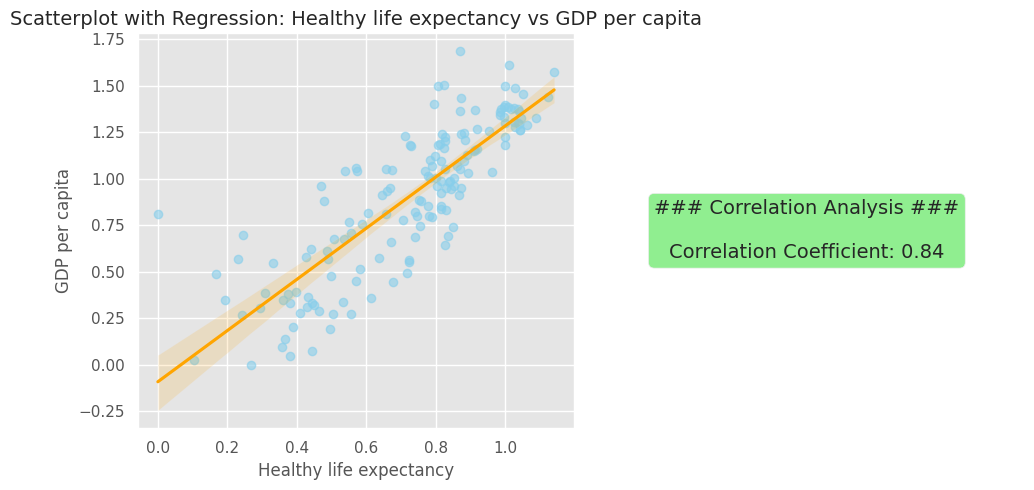

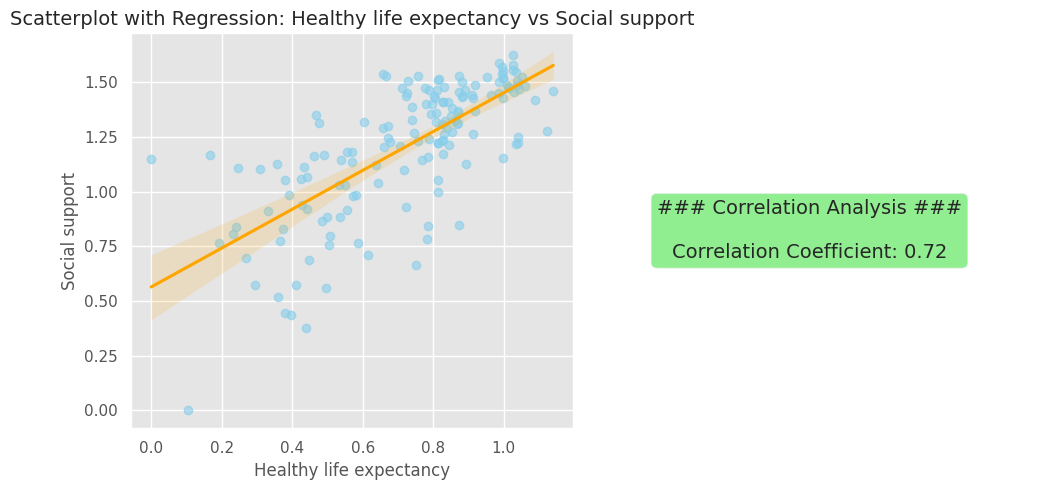

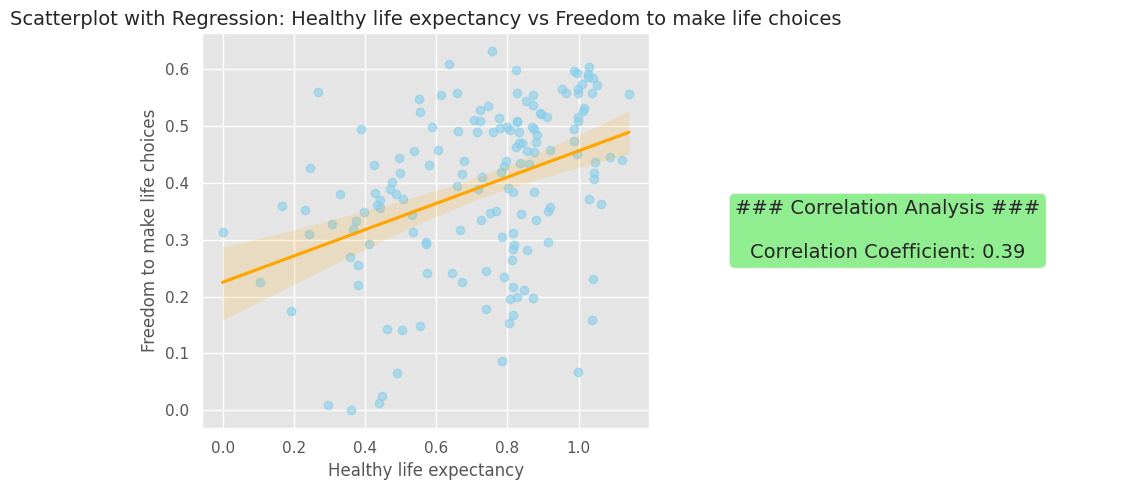

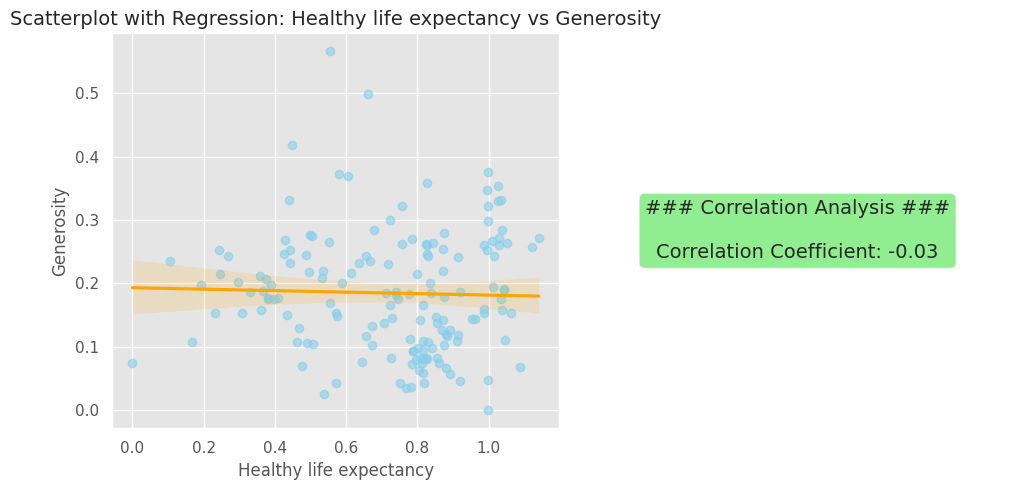

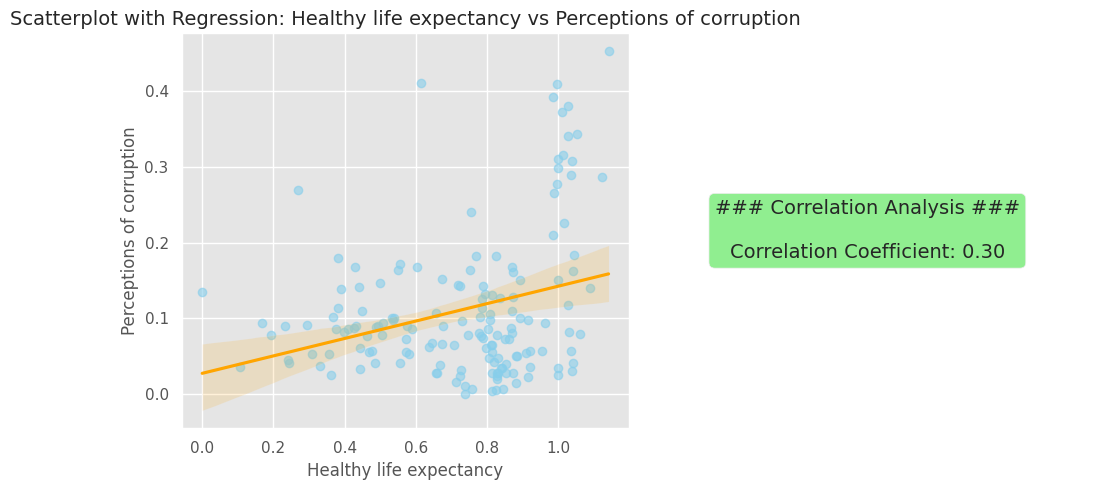

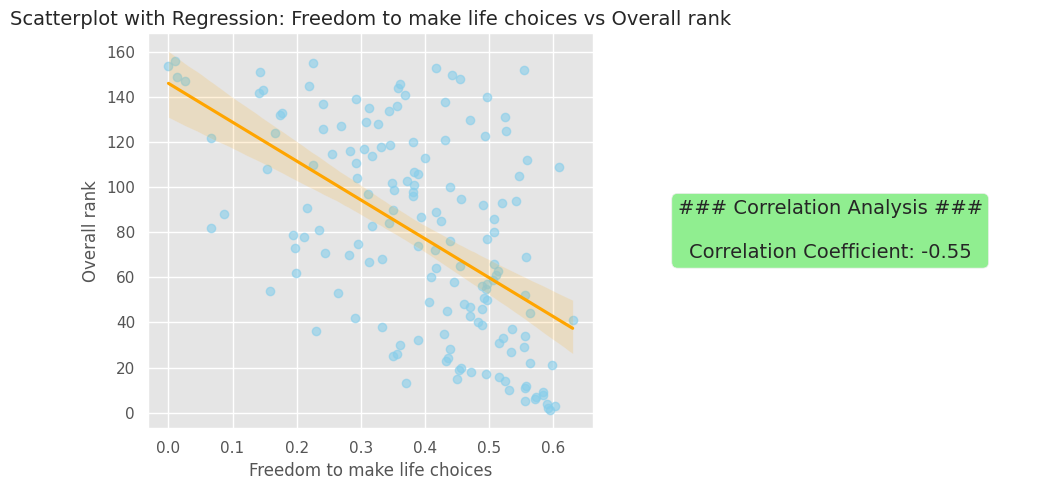

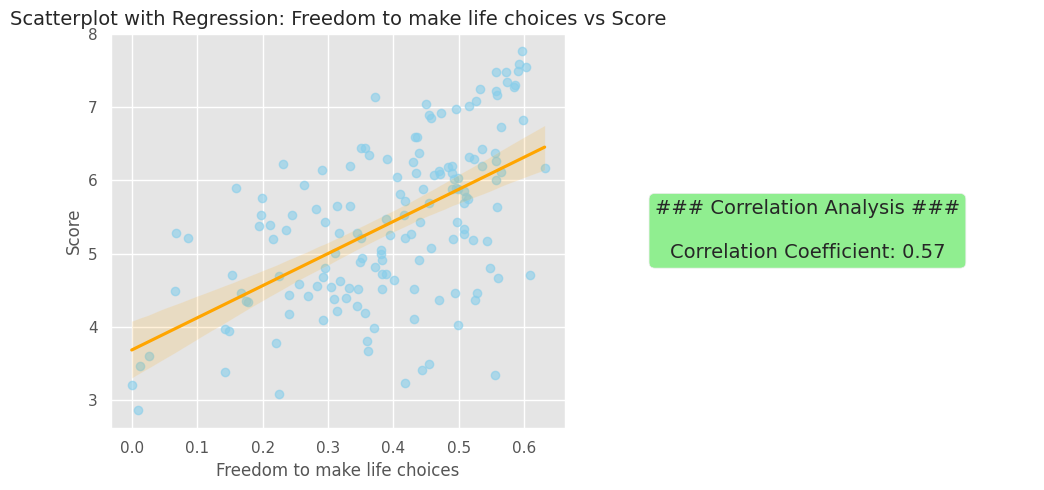

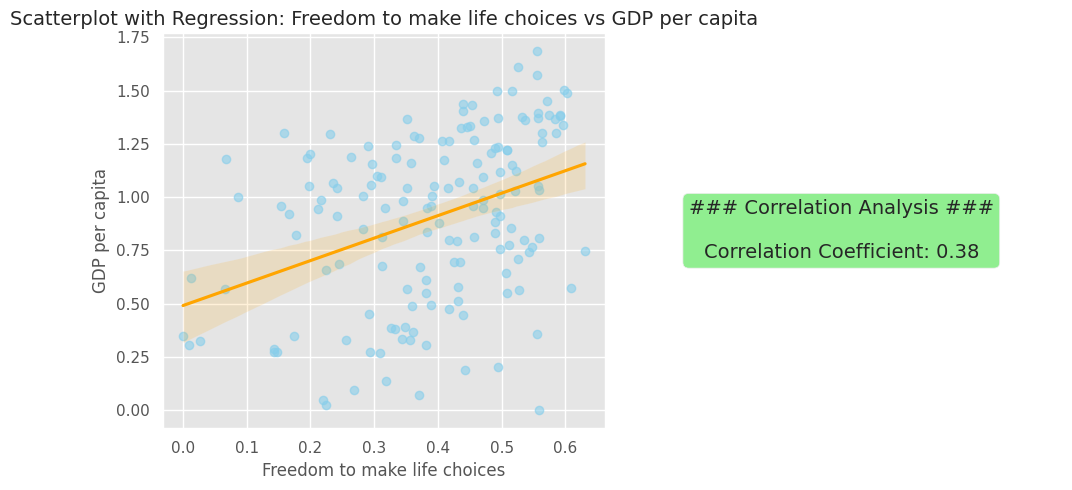

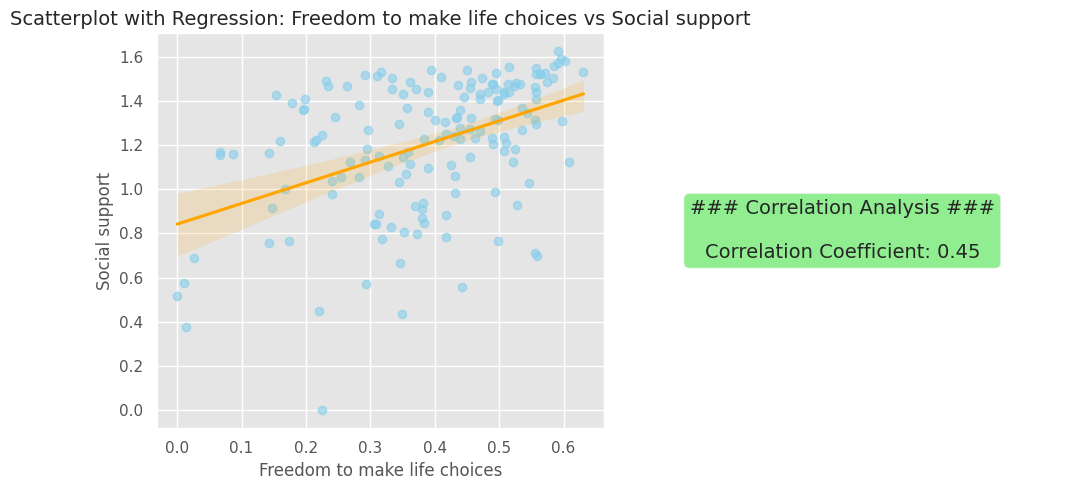

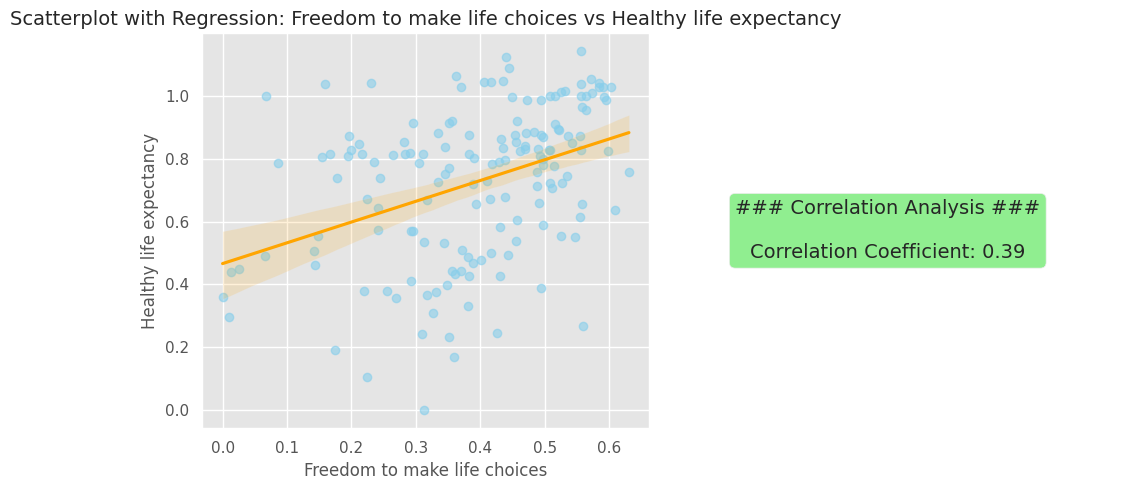

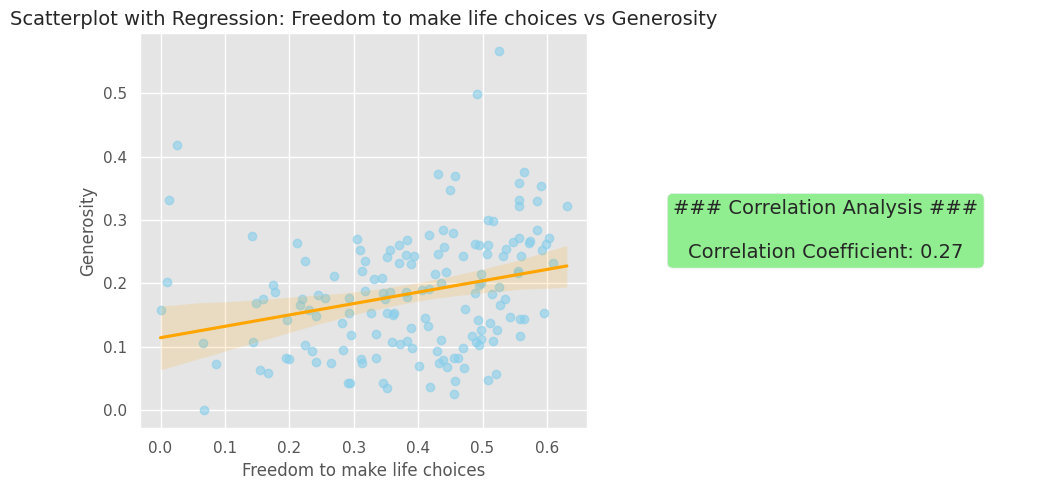

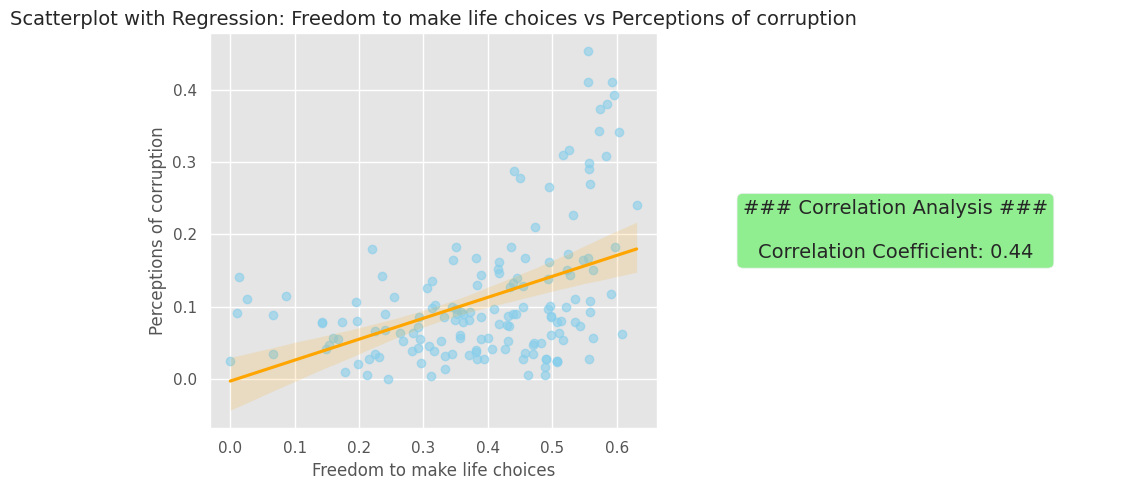

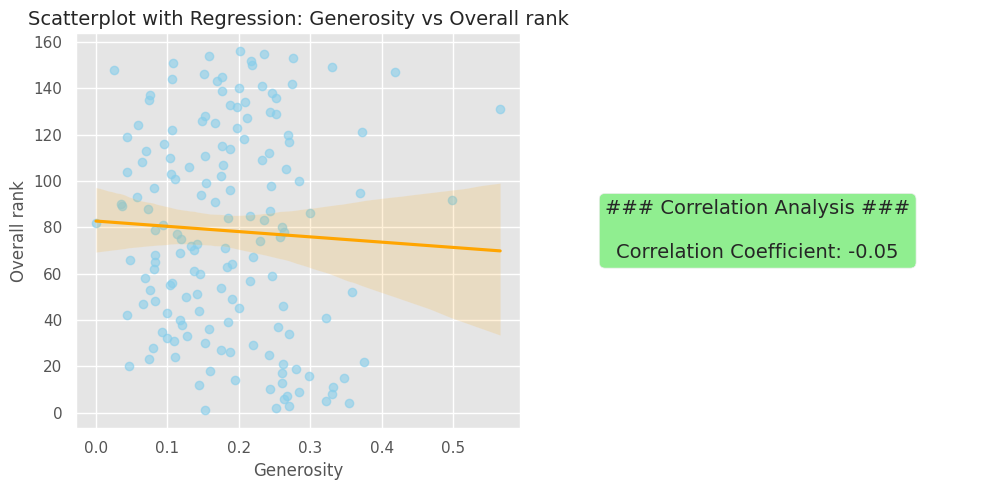

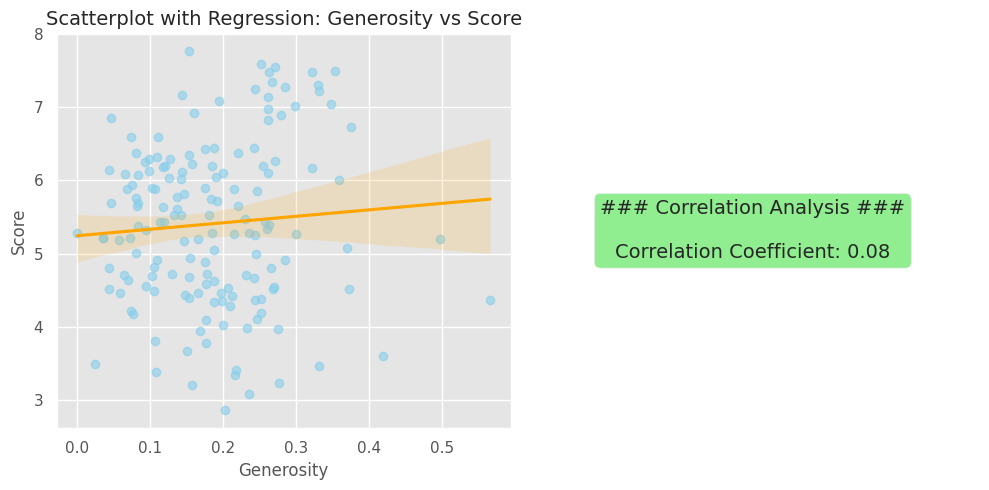

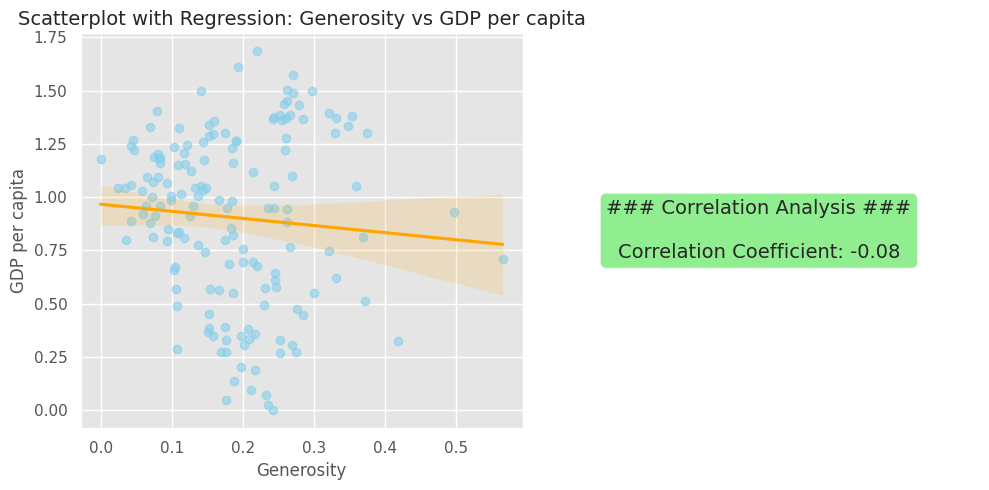

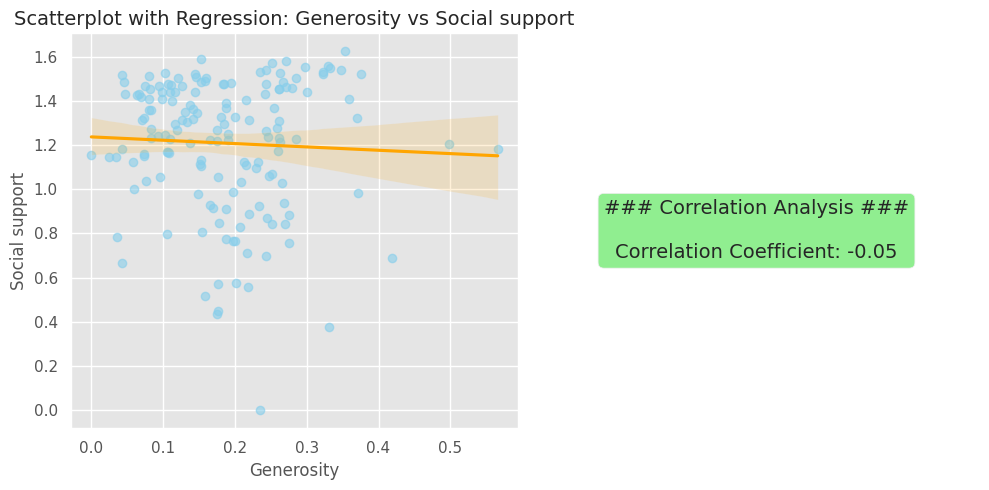

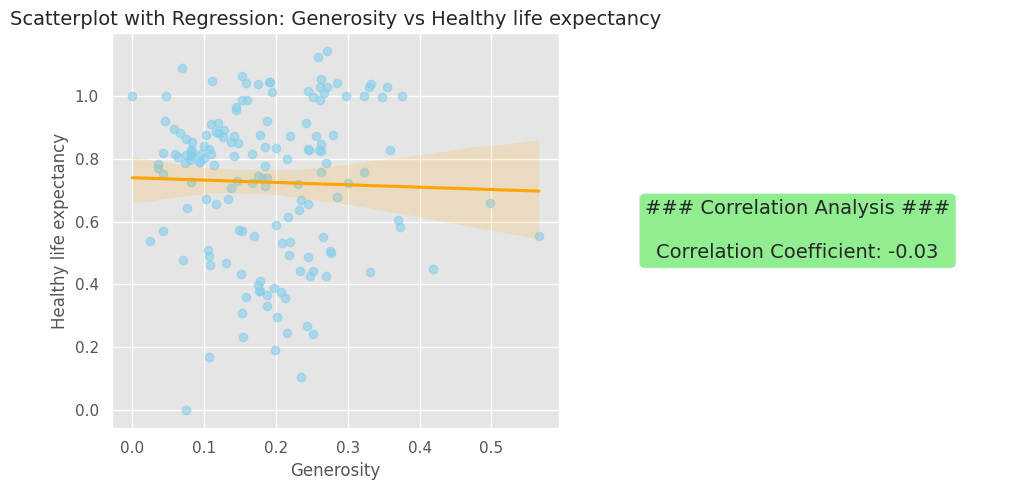

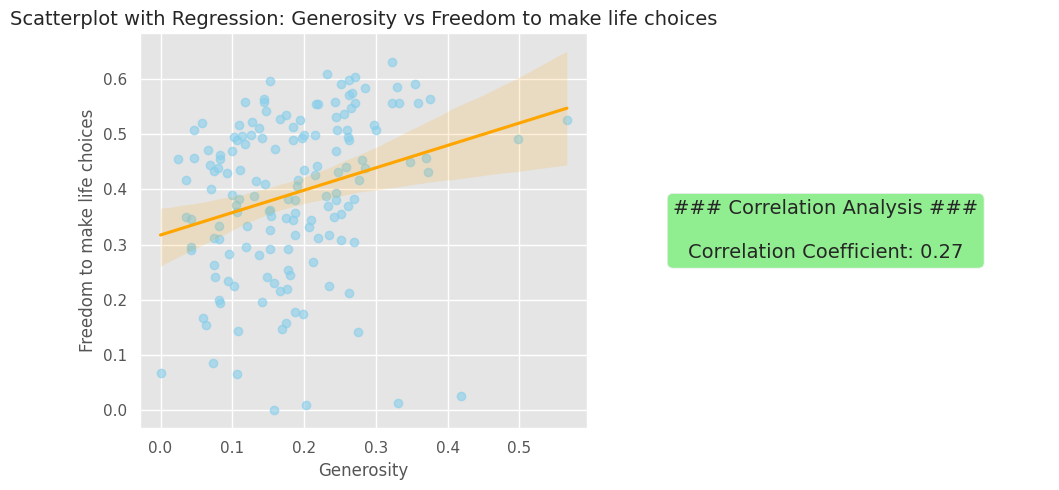

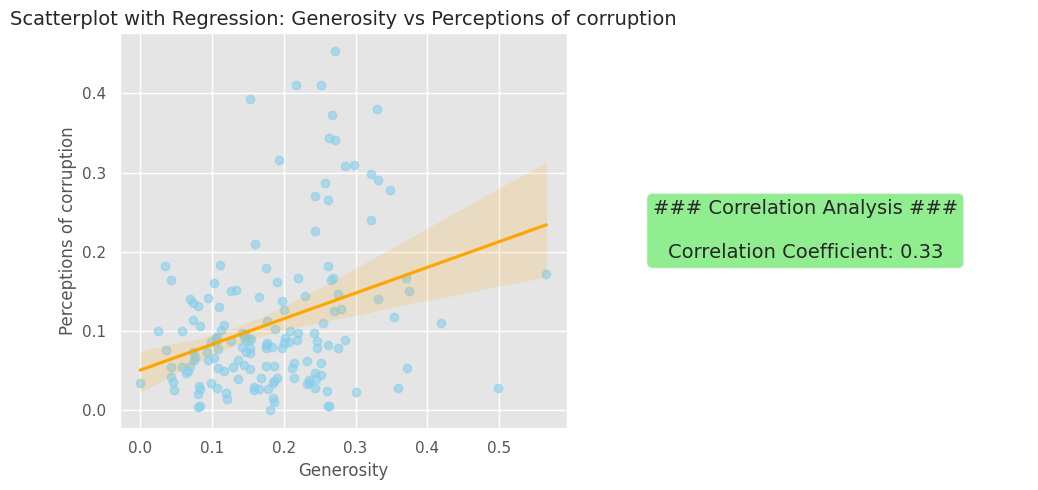

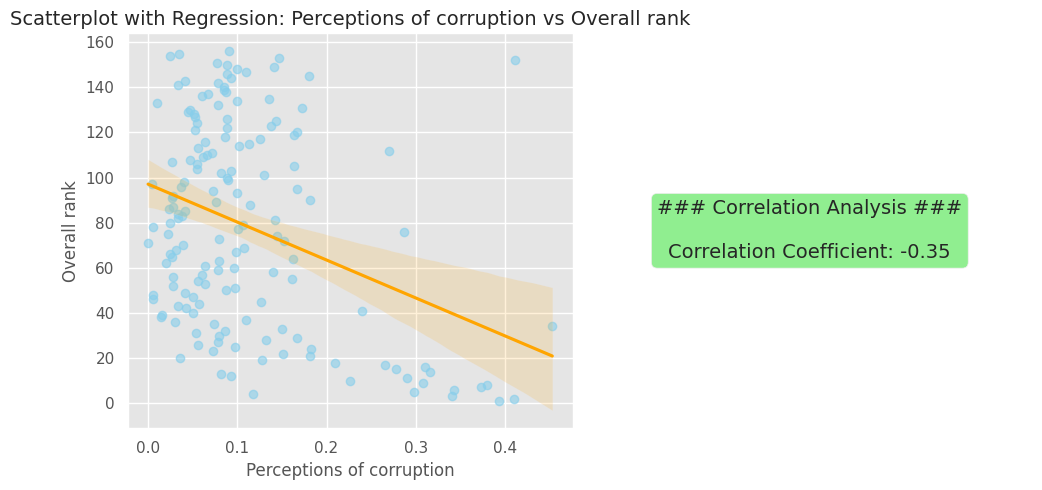

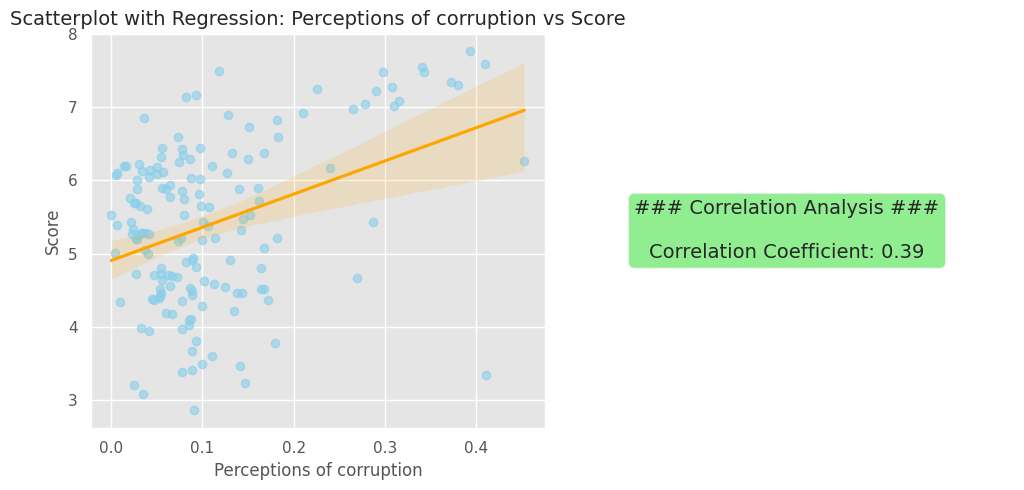

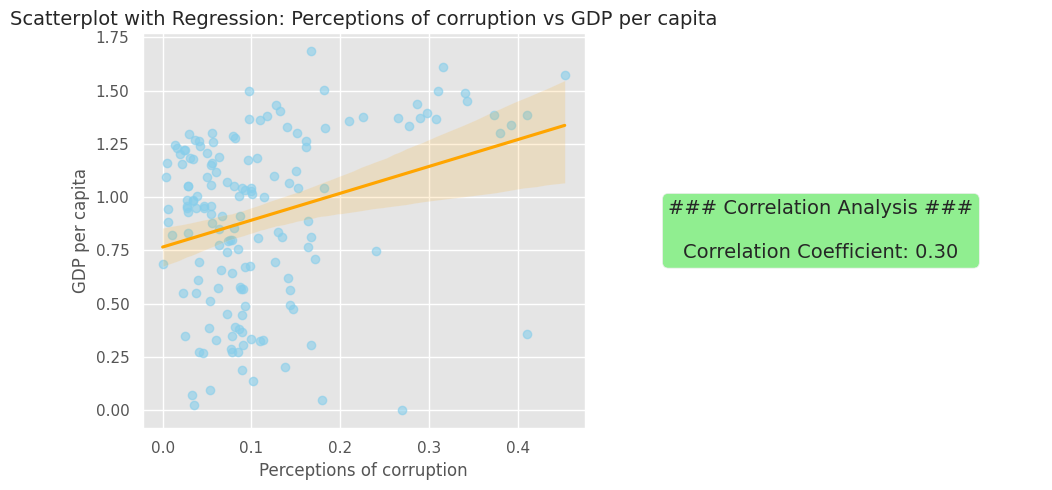

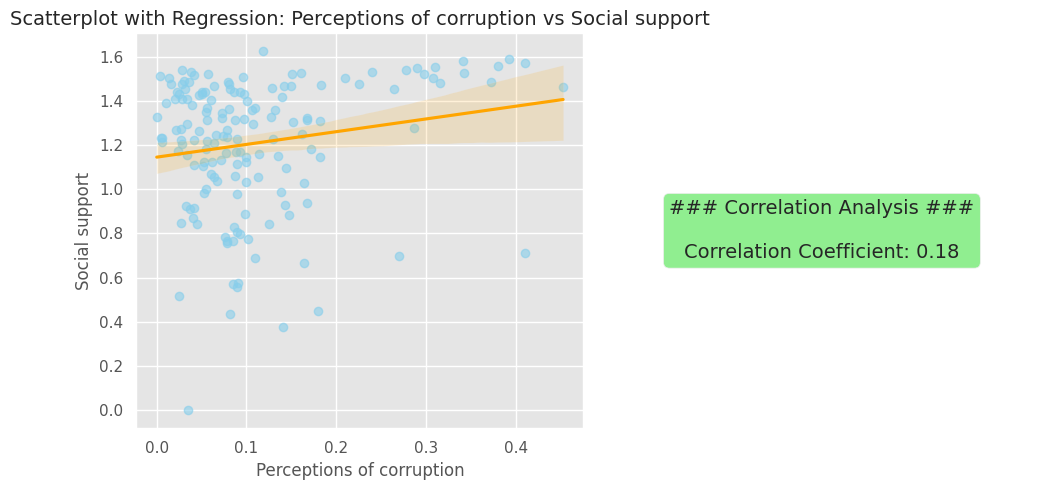

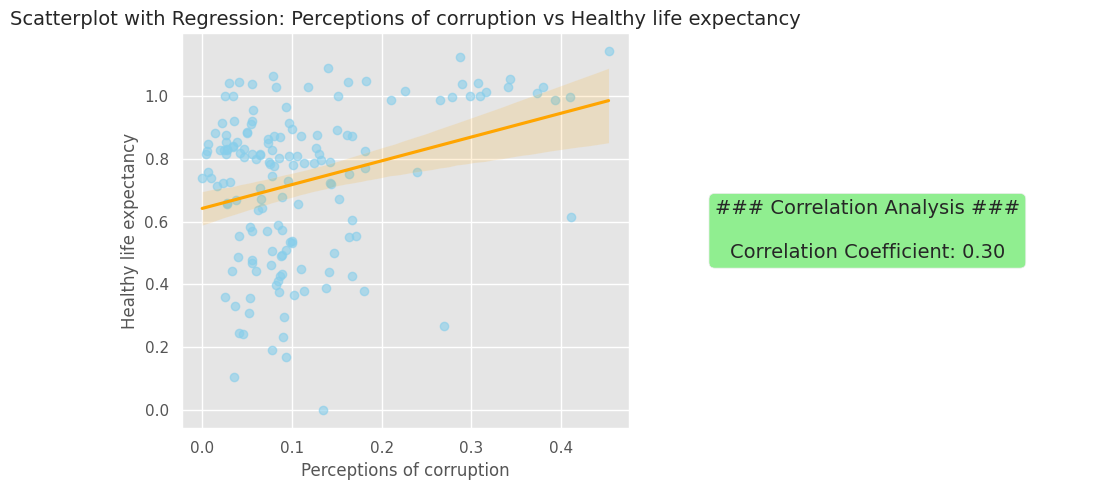

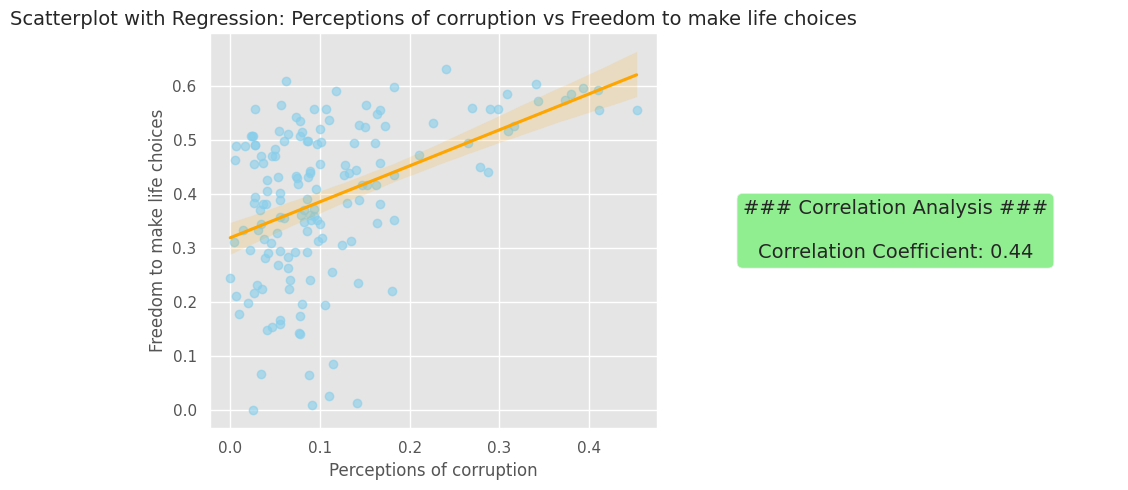

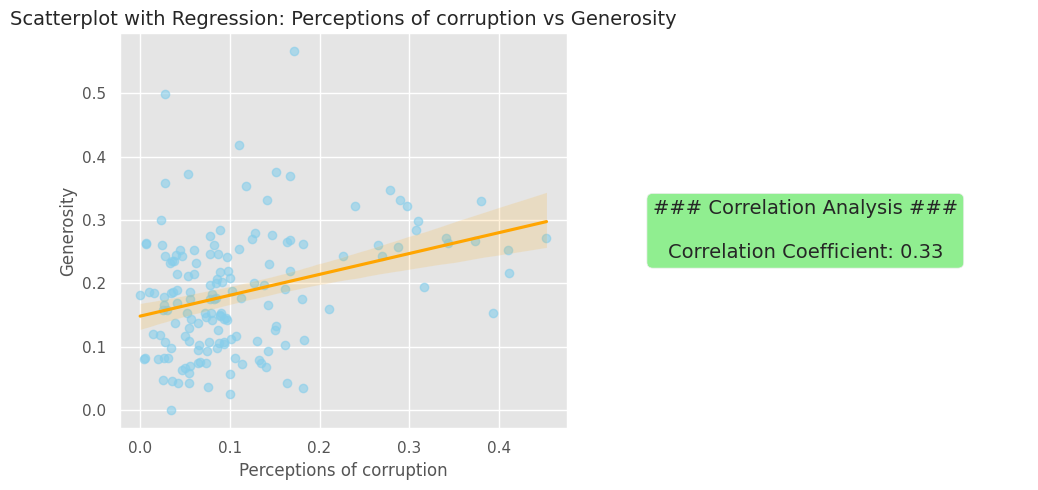

In [ ]:
# doing the bivariate analyses of numerical-numerical type
for col in df1.columns:
  if df[col].dtype == 'float64' or df[col].dtype == 'int64':
    for col2 in df1.columns:
      if df[col2].dtype == 'float64' or df[col2].dtype == 'int64':
        if col != col2:
          bivariate_analysis_numerical_numerical(df1, col, col2)

#  **5. Preprocessing**

## **5.1 Preprocessing For Year 2019**

### **5.1.1 Missing Values**

checkig the missing values for 2019

In [ ]:
check_missing_values(df1)

No missing values found in the dataset.


[]

### **5.1.2 Duplicated And Low Variance Data**

In [ ]:
check_duplicates(df1)

No duplicate rows found in the dataset


Empty DataFrame
Columns: []
Index: []

In [ ]:
calculate_duplicate_percentage(df1)

No duplicate rows found in the dataset
Percentage of duplicate rows: 0.00%


0.0

### **5.1.3 Feature Engineering & Selection**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df_new = pd.read_csv('/content/2019.csv')

In [ ]:
# drop categorical feature
df_new = df_new.drop(['Country or region'], axis=1)

In [ ]:


# Step 2: Preprocessing - Standardize the features (PCA is sensitive to scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new)

# Step 3: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_result = pca.fit_transform(scaled_data)

# Step 4: Output the number of principal components selected
print(f"Number of principal components selected: {pca.n_components_}")

# Step 5: Check the explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Step 6: Check the transformed data (new features after PCA)
print(f"Transformed data shape: {pca_result.shape}")

# Step 7: If you want to add the new reduced data back to a DataFrame (optional)
pca_df = pd.DataFrame(pca_result)


Number of principal components selected: 6
Explained variance ratio: [0.58605806 0.17890682 0.07709477 0.06953863 0.03486571 0.03270265]
Transformed data shape: (156, 6)


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.9 KB


In [ ]:
df1 = df_new

<Axes: >

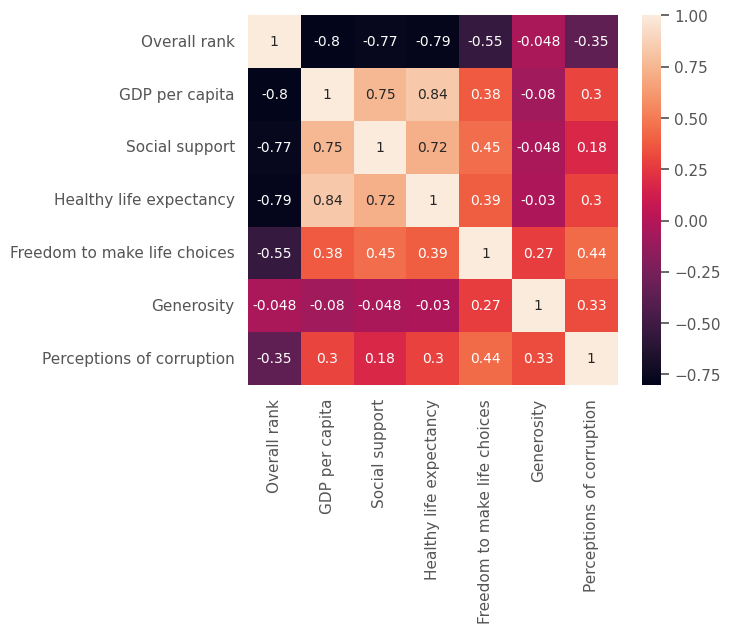

In [ ]:

correl = df1.corr()
f, ax = plt.subplots()
# masking the upper triagle repleated values
# masking = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(correl, annot = True, square=True )

In [ ]:
df1.drop(['Overall rank'], axis=1, inplace=True)

<Axes: >

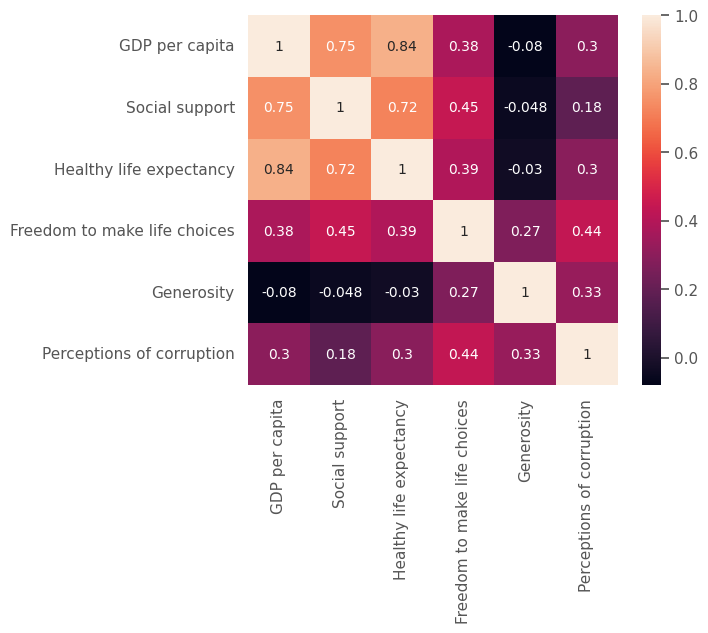

In [ ]:

correl = df1.corr()
f, ax = plt.subplots()
# masking the upper triagle repleated values
# masking = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(correl, annot = True, square=True )

In [ ]:
df1.drop(['GDP per capita'], axis=1, inplace=True)

<Axes: >

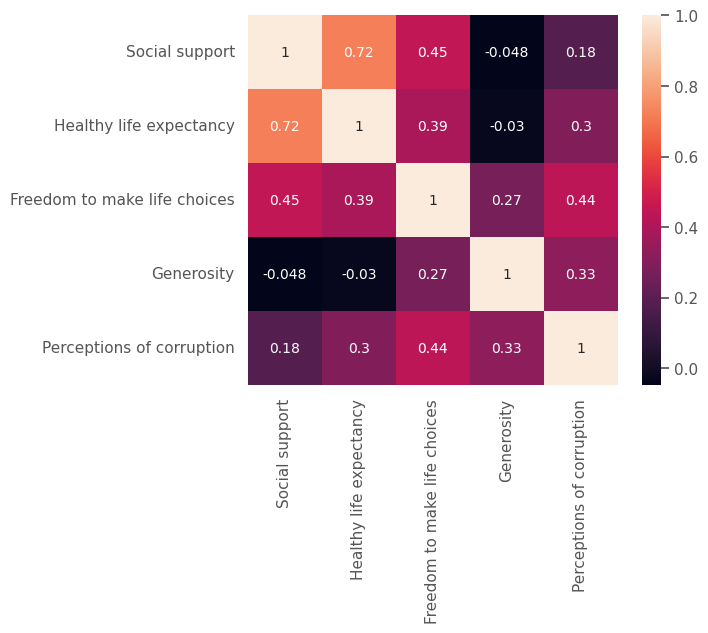

In [ ]:

correl = df1.corr()
f, ax = plt.subplots()
# masking the upper triagle repleated values
# masking = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(correl, annot = True, square=True )

In [ ]:
df1.drop(['Healthy life expectancy'], axis=1, inplace=True)

### **5.1.4 Features Scaling**

In [ ]:
# standardization of features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[df1.columns] = scaler.fit_transform(df1[df1.columns])


# **K MEANS CLUSTERING**

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.9 KB


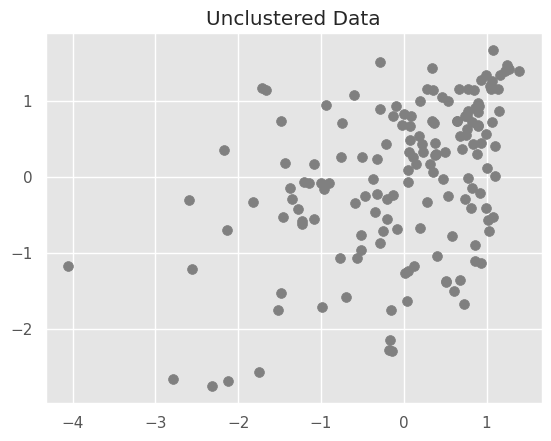

In [ ]:
# Plot the data
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], s=50, color='gray')
plt.title("Unclustered Data")
plt.show()

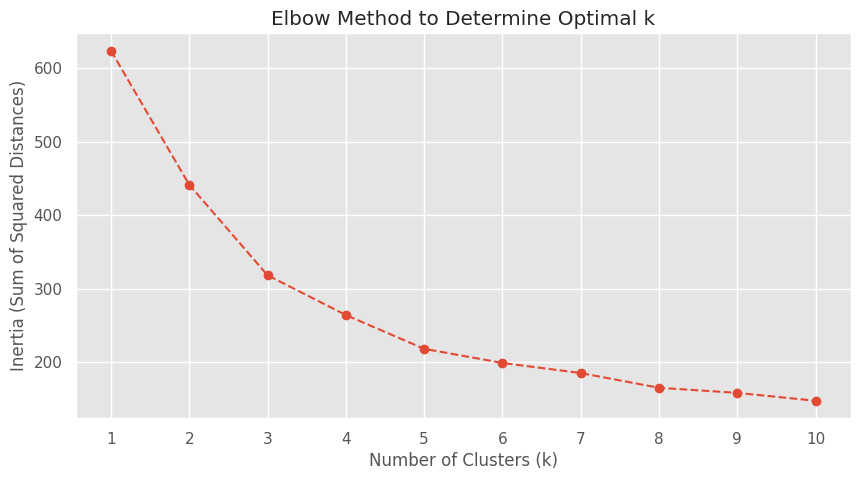

In [ ]:

from sklearn.cluster import KMeans

# Apply the Elbow Method
inertia = []
k_values = range(1, 11) # Test k values from 1 to 10
for k in k_values:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(df1)
  inertia.append(kmeans.inertia_)
# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

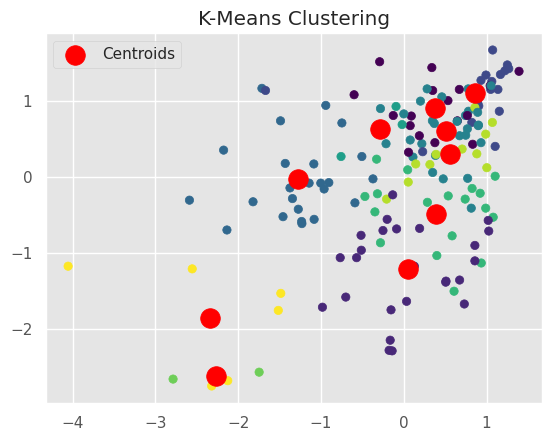

In [ ]:
# Visualize results
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

#### **Visualization of Results**

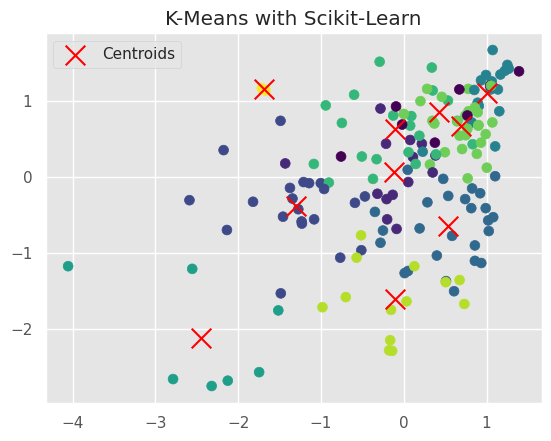

In [ ]:
from sklearn.cluster import KMeans
# Initialize K-Means
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(df1)
# Visualize results
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.title("K-Means with Scikit-Learn")
plt.legend()
plt.show()

# **DBSCAN**

## **Applying DBSCAN**

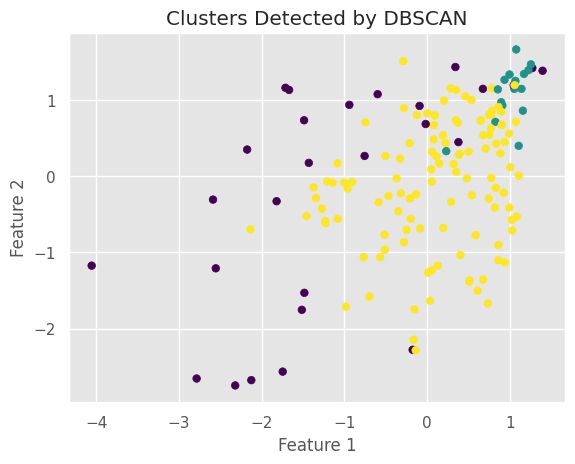

In [ ]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
# Fit the model and predict clusters
y_pred = dbscan.fit_predict(df1)
# Visualize the clusters
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], c=y_pred, cmap='viridis', s=30)
plt.title("Clusters Detected by DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## **Understanding the Output**

In [ ]:
# Display unique cluster labels
unique_labels = set(y_pred)
print(f"Unique cluster labels: {unique_labels}")

Unique cluster labels: {0, 1, -1}


## **Visualizing Noise and Clusters Separately**

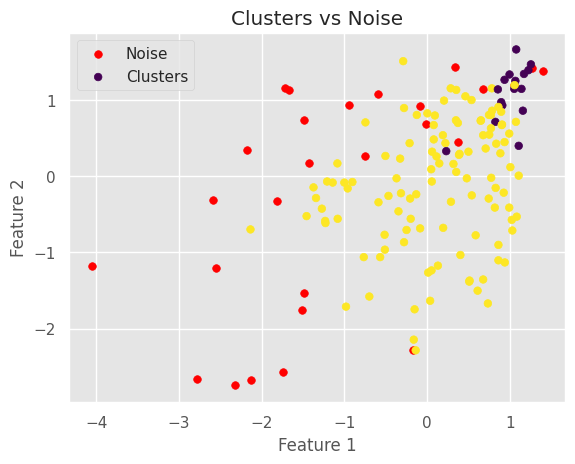

In [ ]:
# Separate noise and clusters
noise_points = df1[y_pred == -1]
clusters = df1[y_pred != -1]
plt.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], c='red', s=30, label='Noise')
plt.scatter(clusters.iloc[:, 0], clusters.iloc[:, 1], c=y_pred[y_pred != -1], cmap='viridis', s=30, label='Clusters')
plt.title("Clusters vs Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# **HDBSCAN**

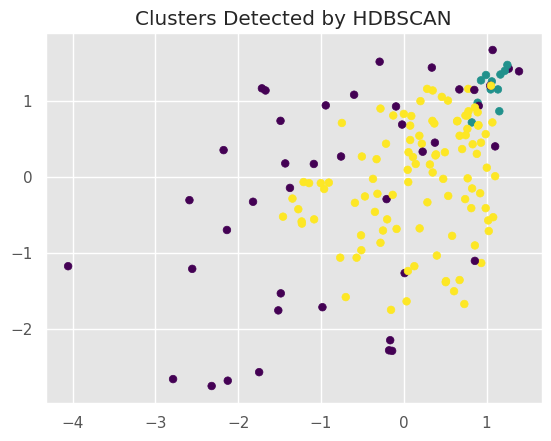

In [ ]:
import hdbscan
# Apply HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=5)
y_hdb = hdb.fit_predict(df1)
# Visualize clusters
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], c=y_hdb, cmap='viridis', s=30)
plt.title("Clusters Detected by HDBSCAN")
plt.show()

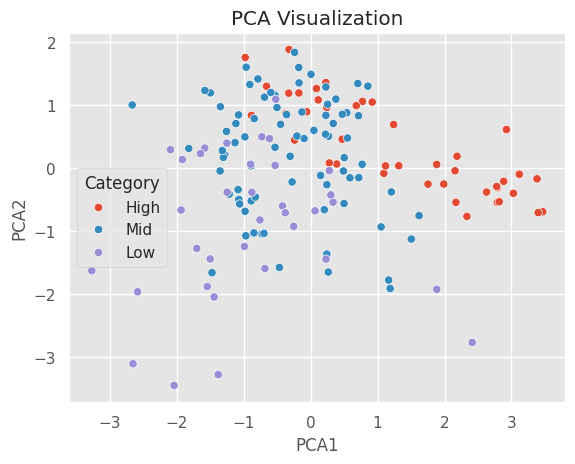

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df1)
df['PCA1'], df['PCA2'] = principal_components[:, 0], principal_components[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Category')
plt.title('PCA Visualization')
plt.show()

# **BONUS**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Social support                156 non-null    float64
 1   Freedom to make life choices  156 non-null    float64
 2   Generosity                    156 non-null    float64
 3   Perceptions of corruption     156 non-null    float64
dtypes: float64(4)
memory usage: 5.0 KB


In [ ]:
df_pred = pd.read_csv('2019.csv')

In [ ]:
X = df1
y = df_pred['Score']

In [ ]:
X

Social support  Freedom to make life choices  Generosity  \
0          1.268098                      1.424282   -0.335404   
1          1.221154                      1.396277    0.707265   
2          1.251332                      1.473292    0.907373   
3          1.392163                      1.389276    1.781530   
4          1.050146                      1.151229    1.444506   
..              ...                           ...         ...   
151       -1.669224                      1.137227    0.338645   
152       -1.085783                      0.171040    0.960033   
153       -2.319726                     -2.748526   -0.282744   
154       -4.053282                     -1.173221    0.528221   
155       -2.125246                     -2.678512    0.180664   

     Perceptions of corruption  
0                     2.996757  
1                     3.177158  
2                     2.444941  
3                     0.078500  
4                     1.988632  
..                         ...  
151                   3.187770  
152                   0.386244  
153                  -0.908401  
154                  -0.802283  
155                  -0.208019  

[156 rows x 4 columns]

In [ ]:
y

0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.3781708287096457
Mean Absolute Error: 0.6541156250000004


## **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [ ]:
model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='r2',  # Use 'r2' or 'neg_mean_absolute_error'
                           cv=5,          # Number of folds for cross-validation
                           verbose=2,     # Show progress
                           n_jobs=-1)     # Use all available cores


In [ ]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.7302228954273693


In [ ]:
y_pred = best_model.predict(X_test)  # Replace X_test with your test data
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.4227802571330084
Mean Absolute Error: 0.6396969702588542


# **Answers To The Questions**

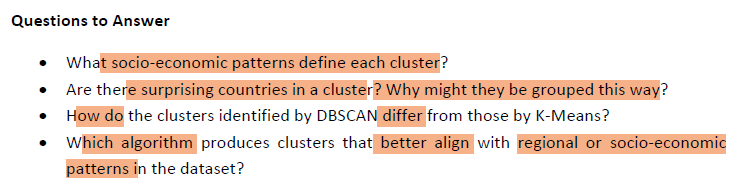

## **Question 1**

Each cluster typically reflects a combination of these socio-economic factors, providing insights into the economic, educational, and health disparities across different populations. The patterns will vary depending on the dataset and the specific context (urban vs. rural, developed vs. developing regions, etc.), but the above factors generally define the socio-economic landscapes of the different clusters.

## **Question 2**

Surprising countries in a cluster may be grouped together due to a combination of economic, political, cultural, geographic, and global factors. These factors create complex interdependencies that transcend traditional boundaries like wealth, development level, or geographic location. The identification of these factors is key to understanding the broader socio-economic patterns that define the clustering, revealing that countries may be more similar than they appear at first glance.

Example:

 Countries that were significantly impacted by the 2008 financial crisis or COVID-19 pandemic may cluster together due to their similar economic recovery patterns, even if they are from different regions or have different political systems.

## **Question 3**

DBSCAN is best suited for data with varying densities, irregularly shaped clusters, or noise. It can handle outliers effectively and does not require specifying the number of clusters beforehand.

K-means is better suited for data with spherical, evenly sized, and equally dense clusters. It is computationally faster and scales well with large datasets but struggles with noisy or irregularly shaped clusters.


## **Question 4**

DBSCAN is more likely to produce clusters that align better with regional or socio-economic patterns, especially when the dataset includes regions with varying densities, irregular cluster shapes, or significant outliers. It is ideal for detecting socio-economic groups that do not follow a uniform distribution or that are geographically spread out.


K-means, on the other hand, works well for socio-economic patterns that are more uniformly distributed or that form well-separated, spherical clusters, but it may struggle when the socio-economic data is more complex, varied, or has outliers.